# 1. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 로드

In [2]:
google_trend_df = pd.read_csv('/content/drive/MyDrive/sogang_thesis_prj/dataset/total_google_trend.csv', index_col=0)
google_trend_df['date'] = pd.to_datetime(google_trend_df['date'])
google_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16511 entries, 0 to 16510
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16511 non-null  datetime64[ns]
 1   trend   16511 non-null  int64         
 2   artist  16511 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 516.0+ KB


In [3]:
google_trend_test_df = pd.read_excel('/content/drive/MyDrive/sogang_thesis_prj/dataset/test_google_trend.xlsx')
google_trend_test_df['date'] = pd.to_datetime(google_trend_test_df['date'])

google_trend_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    279 non-null    datetime64[ns]
 1   trend   279 non-null    int64         
 2   artist  279 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.7+ KB


In [4]:
artist_info_df = pd.read_csv('/content/drive/MyDrive/sogang_thesis_prj/dataset/top5_group_info.csv', index_col=0)
artist_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4839 entries, 0 to 4838
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artist_name          4839 non-null   object 
 1   artist_id            4839 non-null   object 
 2   debut_date           4839 non-null   object 
 3   artist_types         4839 non-null   object 
 4   member_cnt           4839 non-null   int64  
 5   sub_group_cnt        4839 non-null   int64  
 6   label                4734 non-null   object 
 7   album_id             4839 non-null   object 
 8   album_name           4839 non-null   object 
 9   album_type           4839 non-null   object 
 10  release_date         4839 non-null   object 
 11  main_genre           0 non-null      float64
 12  sub_genre            0 non-null      float64
 13  track_cnt            4839 non-null   int64  
 14  avg_track_play_time  4749 non-null   float64
 15  participant_type     4839 non-null   object

In [5]:
google_trend_df['artist'].unique()

array(['aespa', 'BLACKPINK', 'BTS', 'IVE', 'NCT DREAM', 'NewJeans',
       'SEVENTEEN', 'Stray Kids', 'TOMORROW X TOGETHER', 'TWICE'],
      dtype=object)

In [6]:
google_trend_df.groupby('artist').count()['date'].sort_values()

artist
NewJeans                710
IVE                     973
aespa                  1345
SEVENTEEN              1836
BLACKPINK              1875
NCT DREAM              1890
TWICE                  1946
BTS                    1957
Stray Kids             1985
TOMORROW X TOGETHER    1994
Name: date, dtype: int64

In [7]:
# seasonal decompose 내 EDA 결과, NCT Dream의 경우 0값이 많으므로 해당 아티스트 제거
google_trend_df = google_trend_df[google_trend_df['artist'] != 'NCT DREAM']
google_trend_df

date  trend artist
0     2020-10-25      0  aespa
1     2020-10-26      0  aespa
2     2020-10-27      0  aespa
3     2020-10-28      0  aespa
4     2020-10-29      0  aespa
...          ...    ...    ...
16506 2024-06-26     24  TWICE
16507 2024-06-27     23  TWICE
16508 2024-06-28     20  TWICE
16509 2024-06-29     34  TWICE
16510 2024-06-30     30  TWICE

[14621 rows x 3 columns]

# 3. 전처리

In [8]:
google_trend_df.set_index('date', inplace=True)

In [9]:
# 0인 trend 값 interpolation 수행
google_trend_df.loc[google_trend_df['trend'] == 0, 'trend'] = np.NaN

# artist별 time interpolation & backward fill 수행
google_trend_df_list = []
for artist in google_trend_df['artist'].unique():

    single_artist_trend_df = google_trend_df.query(f"artist == '{artist}'")

    single_artist_trend_df['trend2'] = single_artist_trend_df['trend'].interpolate(method='time').fillna(method='bfill')
    google_trend_df_list.append(single_artist_trend_df)

google_trend_df2 = pd.concat(google_trend_df_list).reset_index()
google_trend_df2

date  trend artist  trend2
0     2020-10-25    NaN  aespa     8.0
1     2020-10-26    NaN  aespa     8.0
2     2020-10-27    NaN  aespa     8.0
3     2020-10-28    NaN  aespa     8.0
4     2020-10-29    NaN  aespa     8.0
...          ...    ...    ...     ...
14616 2024-06-26   24.0  TWICE    24.0
14617 2024-06-27   23.0  TWICE    23.0
14618 2024-06-28   20.0  TWICE    20.0
14619 2024-06-29   34.0  TWICE    34.0
14620 2024-06-30   30.0  TWICE    30.0

[14621 rows x 4 columns]

In [10]:
artist_info_df[['artist_name', 'debut_date']].drop_duplicates().sort_values('debut_date')

artist_name  debut_date
200                   BTS  2013-06-13
0               SEVENTEEN  2015-05-26
1564                TWICE  2015-07-07
1739            BLACKPINK  2016-08-08
900             NCT DREAM  2016-08-24
650            Stray Kids  2017-10-17
1084  TOMORROW X TOGETHER  2019-01-10
1364                aespa  2020-10-25
1259                  IVE  2021-11-01
1464             NewJeans  2022-07-22

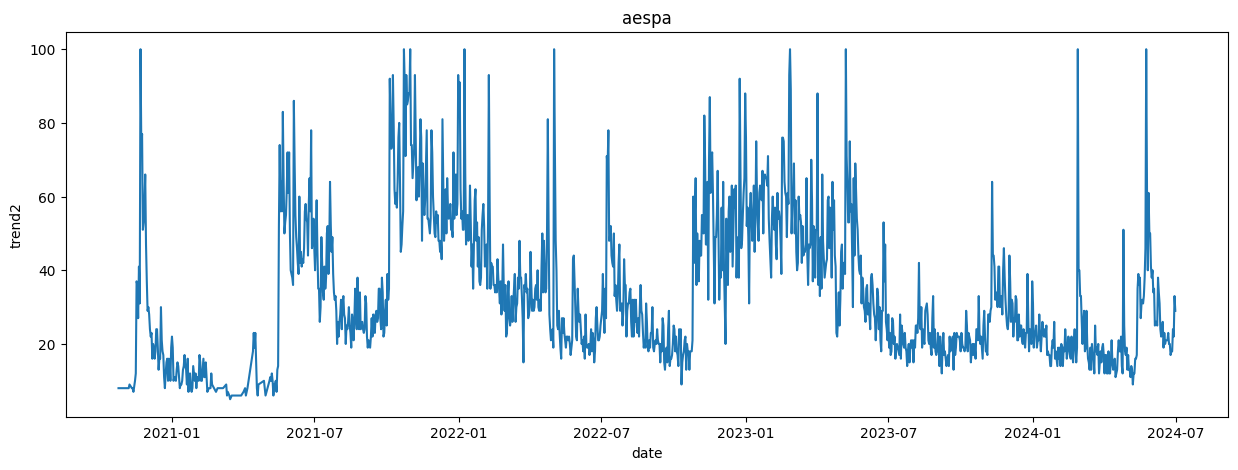

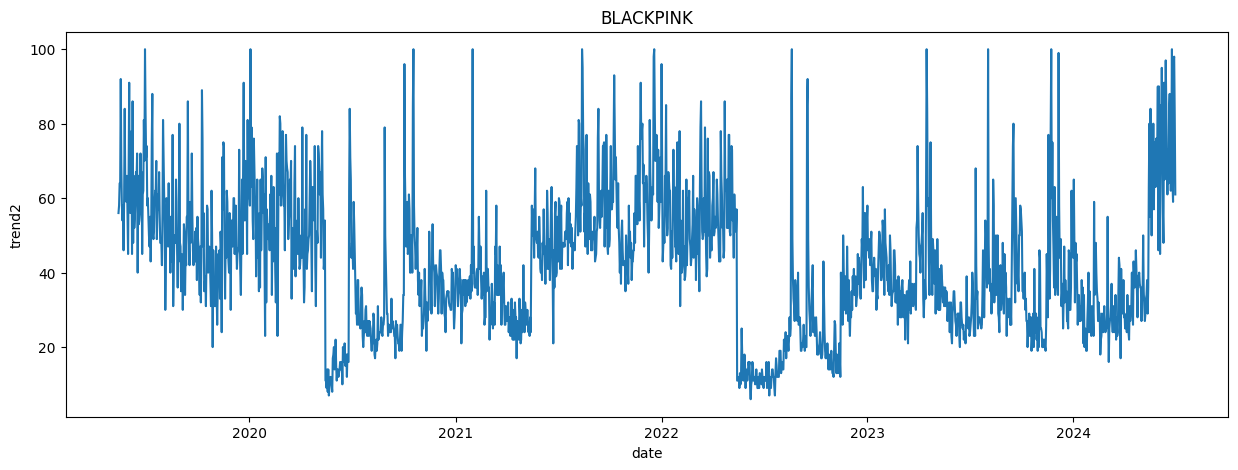

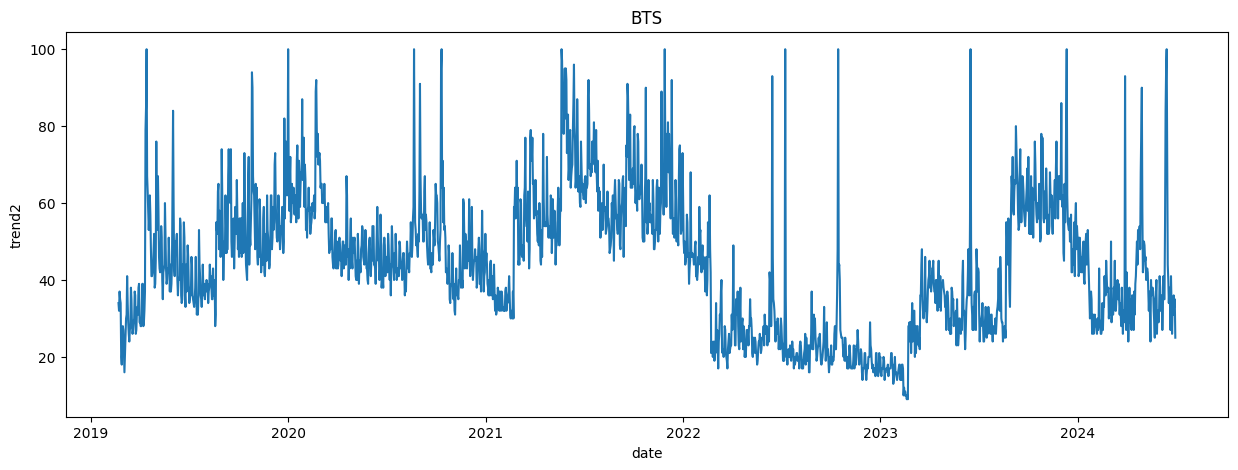

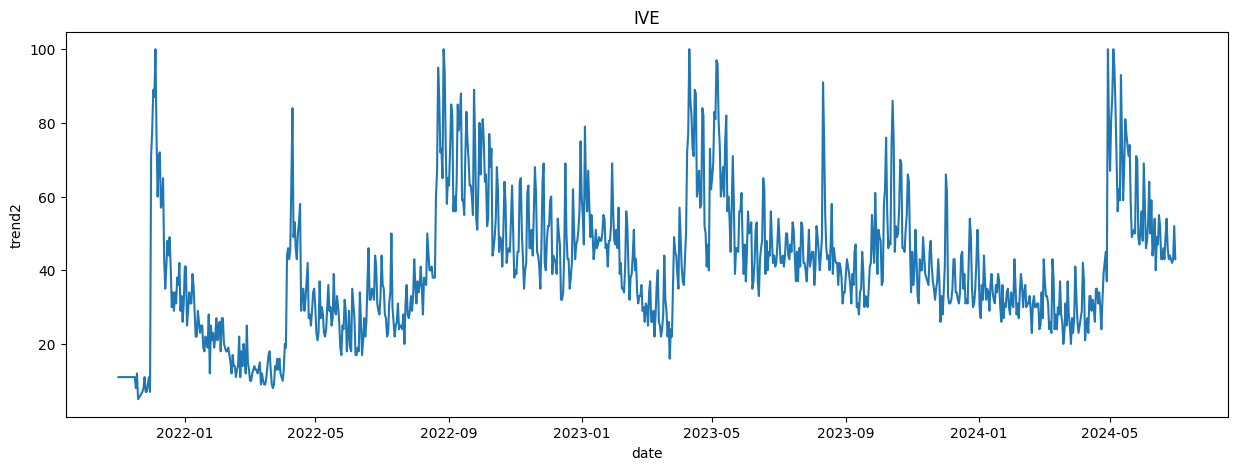

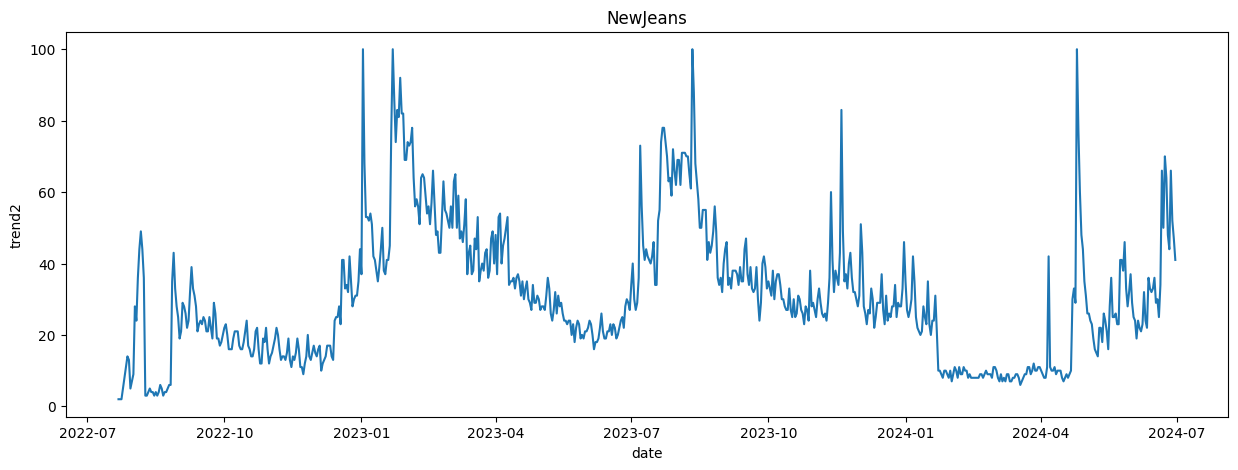

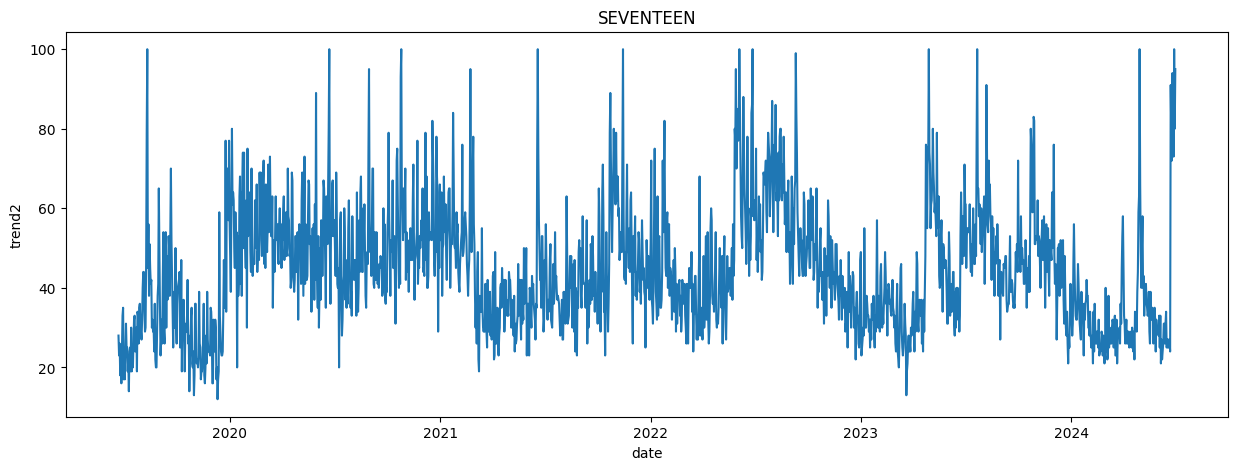

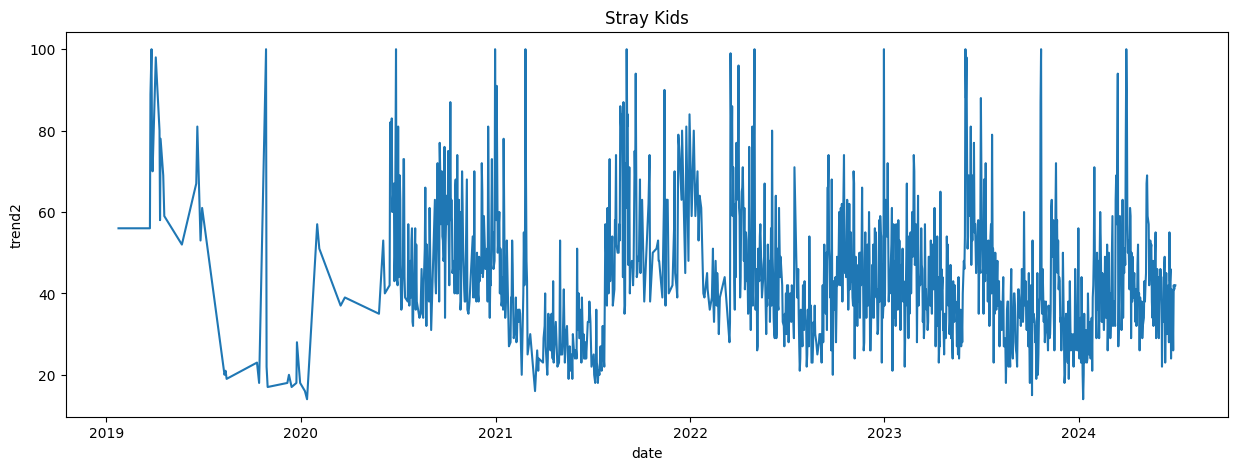

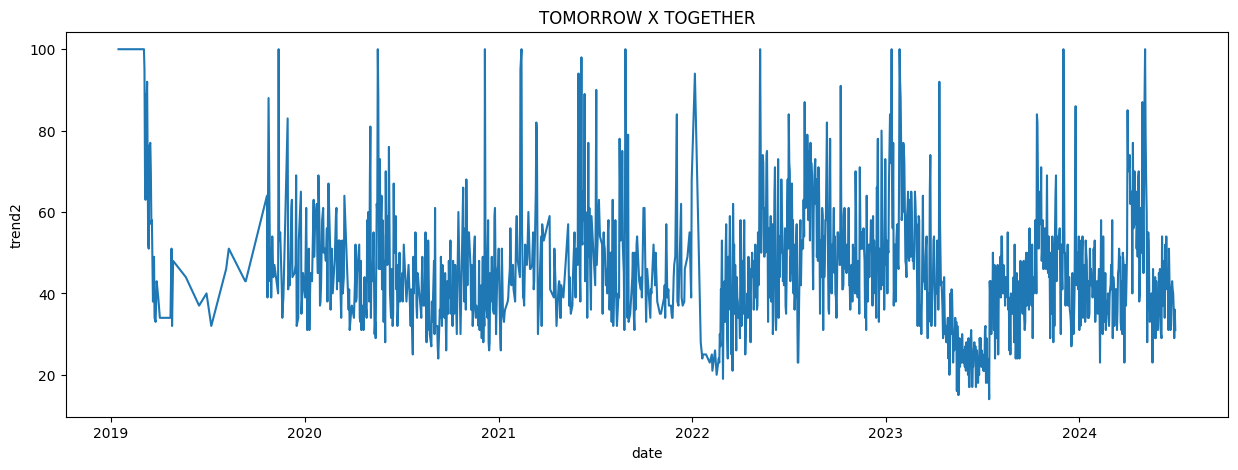

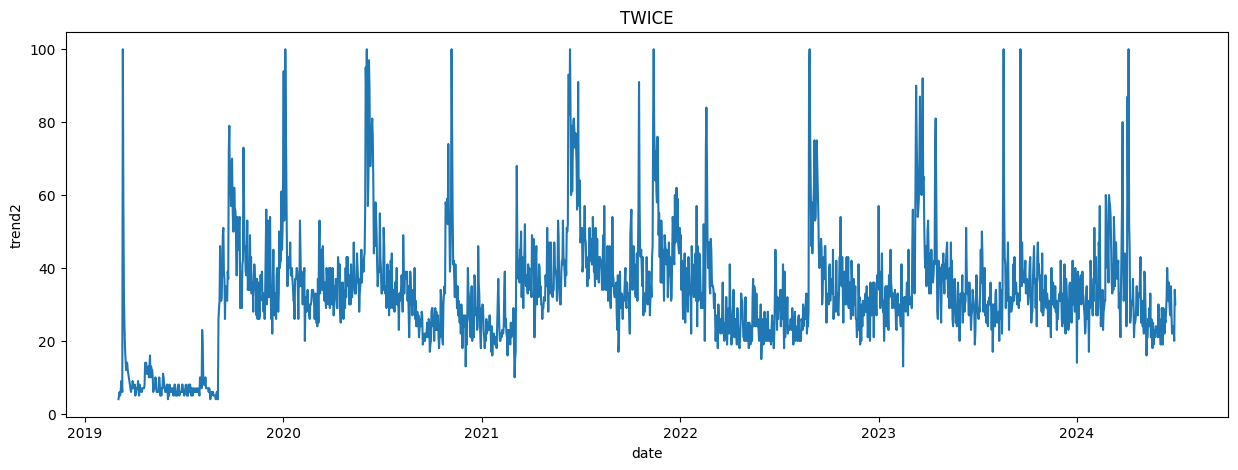

In [11]:
for artist in google_trend_df2['artist'].unique():

    plt.figure(figsize=(15, 5))

    plt.title(artist)
    sns.lineplot(
        data=google_trend_df2[google_trend_df2['artist'] == artist],
        x='date',
        y='trend2',
    )

    plt.show()

# 4. 정상성 검정
* p-value
  * 의미: p-value는 귀무가설(null hypothesis)이 맞을 확률을 나타내며, 일반적으로 귀무가설은 "데이터에 단위근이 존재한다"라는 가정을 의미
  * 단위근: 오늘의 영향력이 미래에 어느 정도 영향을 미치는지를 결정하는 모수
  * p-value < 0.05: 귀무가설을 기각합니다. 즉, 데이터가 정상성을 가진다고 판단할 수 있습니다.
  * p-value >= 0.05: 귀무가설을 기각하지 못합니다. 즉, 데이터가 비정상성을 가진다고 판단할 수 있습니다.

* ADF Statistic
  * 의미: ADF 통계량은 시계열 데이터에 단위근이 존재하는지 여부를 판단하는 데 사용되는 값입니다.
  * 해석: ADF 통계량이 음수일수록 데이터가 정상성을 가질 가능성이 높습니다. 이 값은 임계값과 비교하여 해석됩니다.
  * 1에 가까울수록 오늘의 영향력이 내일에 영향을 미칠 가능성이 크다는 것을 뜻함. 비정상성을 띈다고 해석

* ACF & PACF
  * ACF: 현재 값과 과거 값들 사이의 상관관계 측정
  * PACF: 특정 시차에서의 부분 자기상관 측정
  * ARIMA 모델의 p, d, q 파라미터 최적 차수 탐색 시 유용하게 사용됨

In [12]:
!pip install statsmodels

In [13]:
from statsmodels.tsa.stattools import adfuller

In [49]:
'''
  - NewJeans의 경우, p-value값, ADF Statistic 값 보았을 때, 비정상성을 갖는 데이터로 파악됨
'''
for artist in google_trend_df2['artist'].unique():

    trend_df = google_trend_df2[google_trend_df2['artist'] == artist].query("date >= '2023-06-30'")

    result = adfuller(trend_df['trend2'])
    print(f"<<< {artist} >>>")
    print(f"ADF Statistic = {result[0]}")
    print(f"p-value = {result[1]}")
    print(f"Critical Values = {result[4]}")

    print('\n')

<<< aespa >>>
ADF Statistic = -5.216168237899104
p-value = 8.14786561126747e-06
Critical Values = {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


<<< BLACKPINK >>>
ADF Statistic = -1.376812824499832
p-value = 0.5933404881210769
Critical Values = {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}


<<< BTS >>>
ADF Statistic = -2.7473405053256235
p-value = 0.066198383831352
Critical Values = {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}


<<< IVE >>>
ADF Statistic = -2.792127198959744
p-value = 0.05940717142953713
Critical Values = {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}


<<< NewJeans >>>
ADF Statistic = -1.7313763879158417
p-value = 0.4150232076280635
Critical Values = {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}


<<< SEVENTEEN >>>
ADF Statistic = -3.588115860448916
p-value = 0.005992333957434516
Critical Values

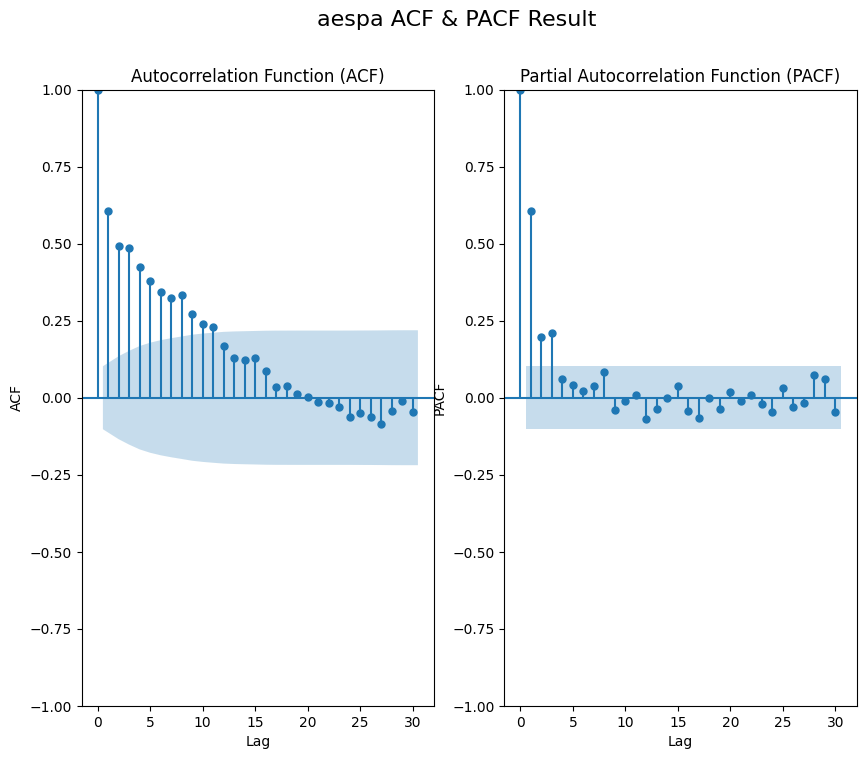

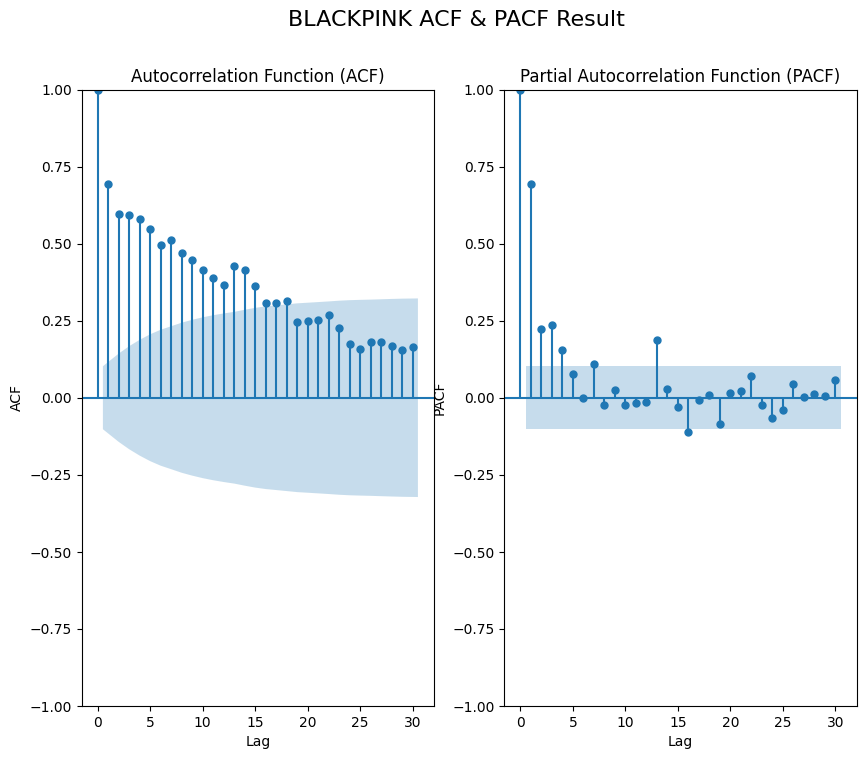

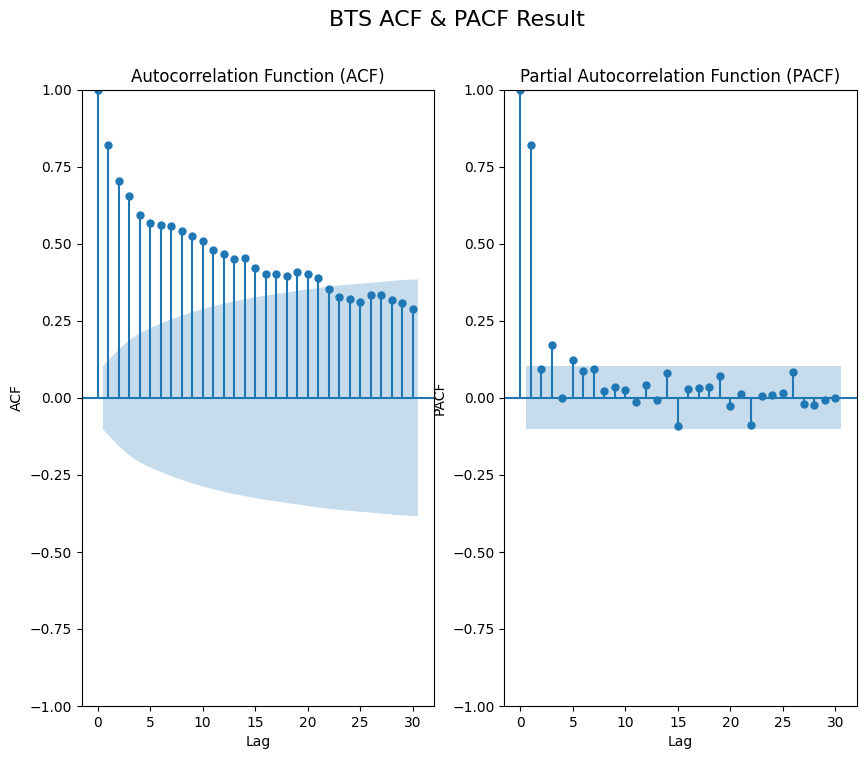

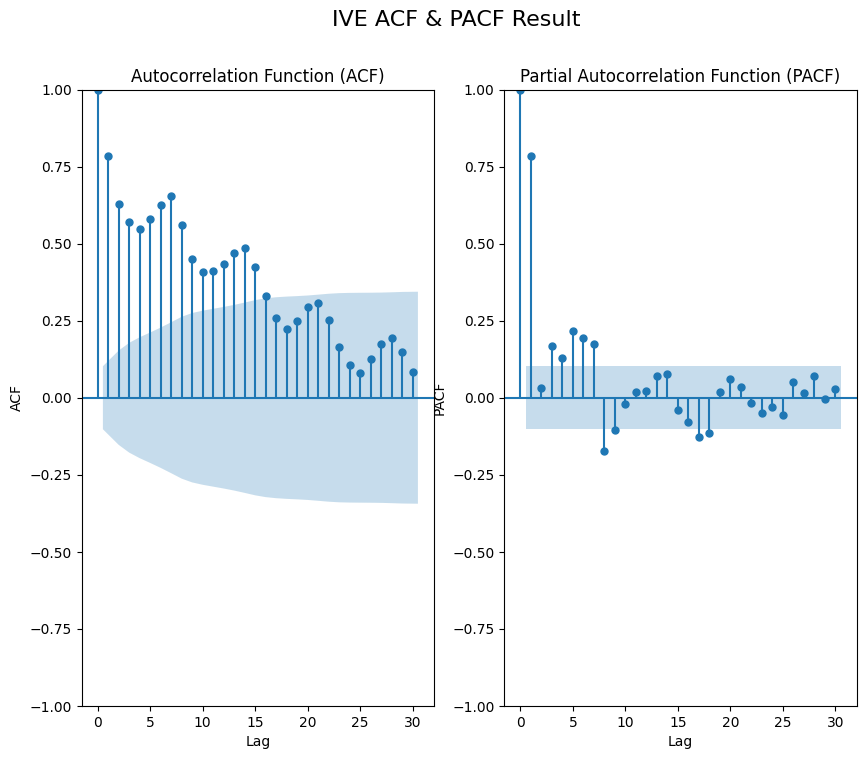

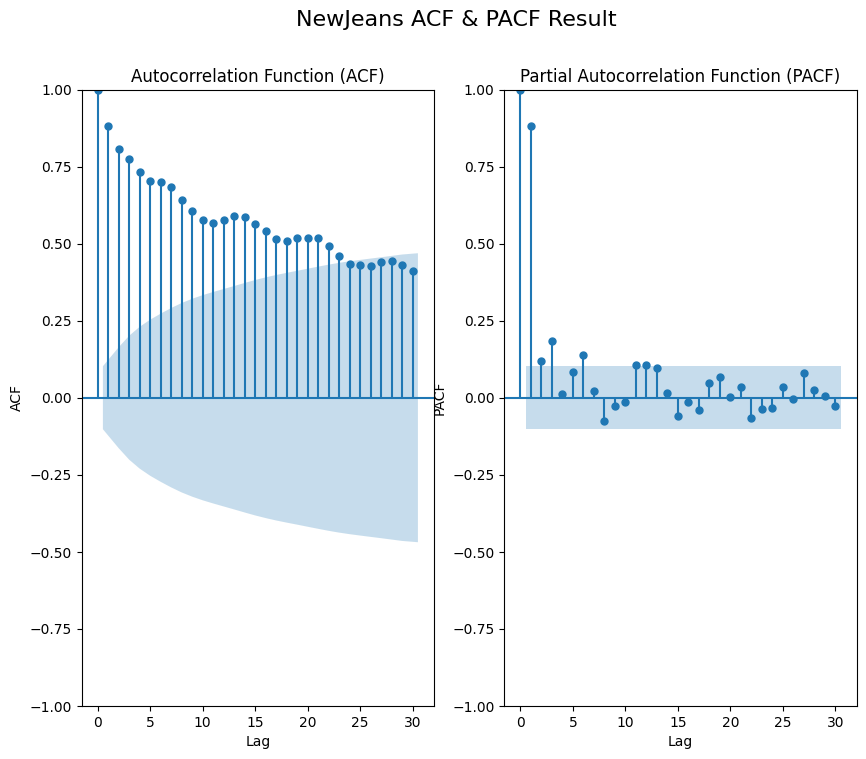

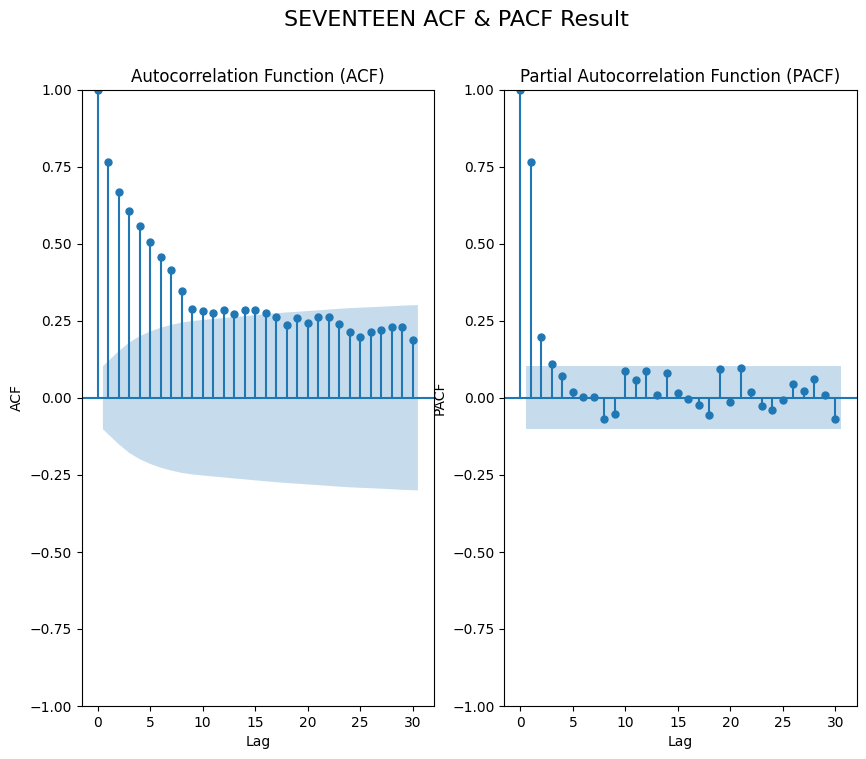

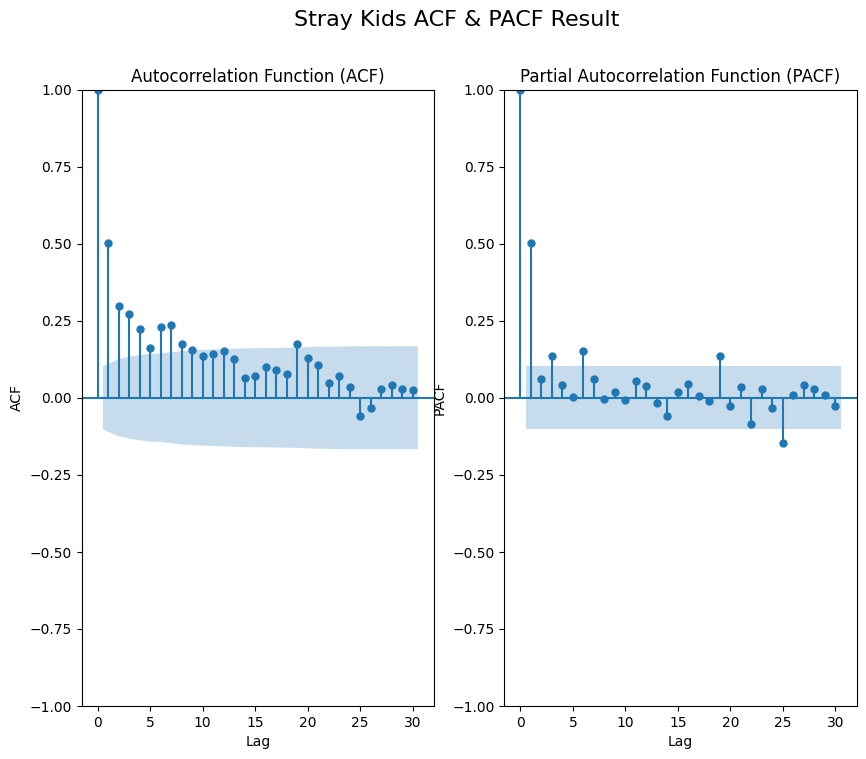

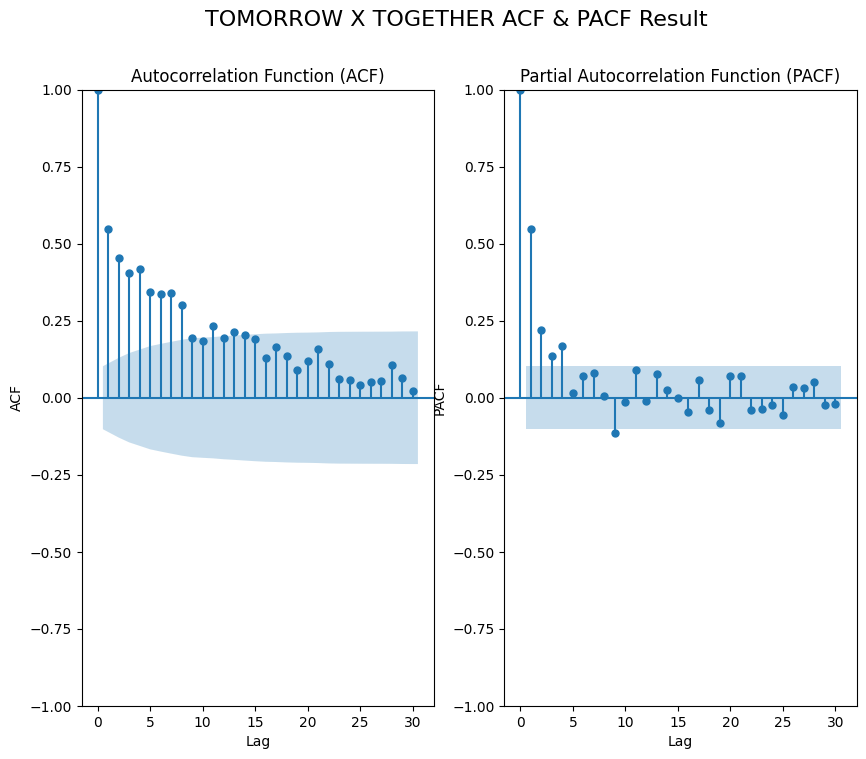

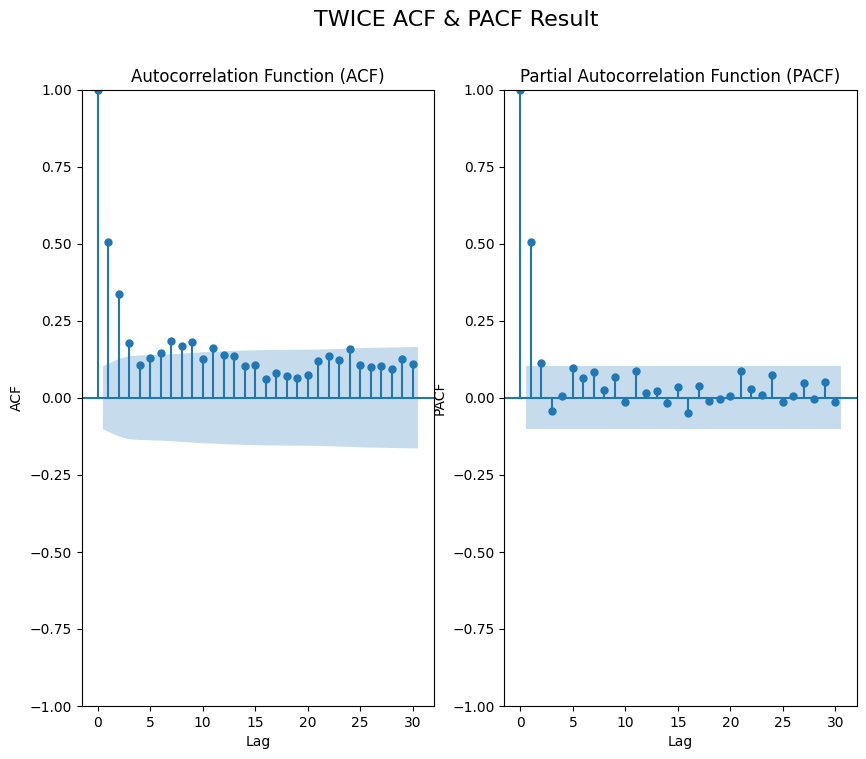

In [48]:
'''
  - ACF, PACF 검정
'''
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for artist in google_trend_df2['artist'].unique():

    trend_df = google_trend_df2[google_trend_df2['artist'] == artist].query("date >= '2023-06-30'")['trend2']

    # lag_num = np.round(len(trend_df) / 4) # 전체 시간의 4분의 1
    lag_num = 30

    # 시계열 데이터 생성 (예: 누적 합계로 단위근을 포함한 데이터)
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    plt.suptitle(f"{artist} ACF & PACF Result", fontsize=16)

    # ACF 시각화
    plot_acf(trend_df, lags=lag_num, ax=axes[0])
    axes[0].set_title("Autocorrelation Function (ACF)")
    axes[0].set_xlabel("Lag")
    axes[0].set_ylabel("ACF")

    # PACF 시각화
    plot_pacf(trend_df, lags=lag_num, method='ywm', ax=axes[1])
    axes[1].set_title("Partial Autocorrelation Function (PACF)")
    axes[1].set_xlabel("Lag")
    axes[1].set_ylabel("PACF")

    plt.show()

# AR 모델
* lag 값 4로 설정

In [50]:
# ACF, PACF 검정 결과 기반으로 AR(4) 모델 구현
# 정상성 데이터 변환 전
from statsmodels.tsa.ar_model import AutoReg

forecast_df_list = []
for artist in google_trend_df2['artist'].unique():

    artist_trend_df = google_trend_df2[google_trend_df2['artist'] == artist].reset_index(drop=True)

    start_date = artist_trend_df.loc[len(artist_trend_df)-1, 'date'] - pd.DateOffset(years=1) # 아티스트 별 수집 마지막 기간으로부터 이전 1년 데이터만 사용
    # start_date = google_trend_df2[google_trend_df2['artist'] == artist].reset_index(drop=True).loc[0, 'date'] # 아티스트 별 수집 첫 기간부터 적용

    trend_df = artist_trend_df[artist_trend_df['date'] >= start_date].reset_index(drop=True)['trend2']

    # AR(4) 모델 적합
    model = AutoReg(trend_df, lags=4)
    model_fit = model.fit()

    # 모델 예측
    end_date = artist_trend_df.loc[len(artist_trend_df)-1, 'date'] + pd.DateOffset(days=30) # 이후 한 달 예측

    date_df = pd.date_range(start=start_date, end=end_date, freq='D')
    date_df = pd.DataFrame(date_df, columns=['date'])

    end = len(trend_df) + 30  # 30-step ahead forecast
    forecast_df = model_fit.predict(start=0, end=end)

    result_df = pd.concat([date_df, forecast_df], axis=1).merge(google_trend_df2[google_trend_df2['artist'] == artist][['date', 'trend2']], how='left', on='date')
    result_df.columns = ['date', 'forecast', 'origin']

    result_df['artist'] = artist

    forecast_df_list.append(result_df)

forecast_df = pd.concat(forecast_df_list, ignore_index=True)
forecast_df

date   forecast  origin artist
0    2023-06-30        NaN    21.0  aespa
1    2023-07-01        NaN    28.0  aespa
2    2023-07-02        NaN    19.0  aespa
3    2023-07-03        NaN    23.0  aespa
4    2023-07-04  23.548211    17.0  aespa
...         ...        ...     ...    ...
3577 2024-07-27  33.367551     NaN  TWICE
3578 2024-07-28  33.367552     NaN  TWICE
3579 2024-07-29  33.367552     NaN  TWICE
3580 2024-07-30  33.367552     NaN  TWICE
3581        NaT  33.367552     NaN  TWICE

[3582 rows x 4 columns]

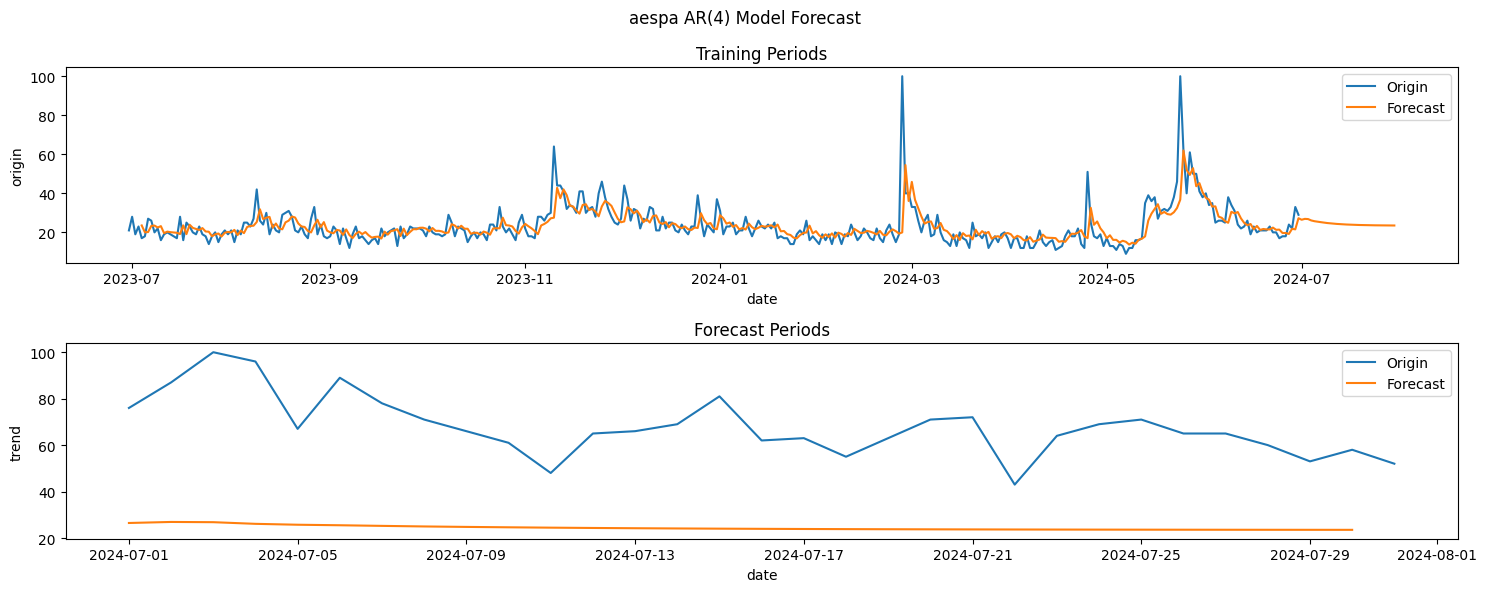

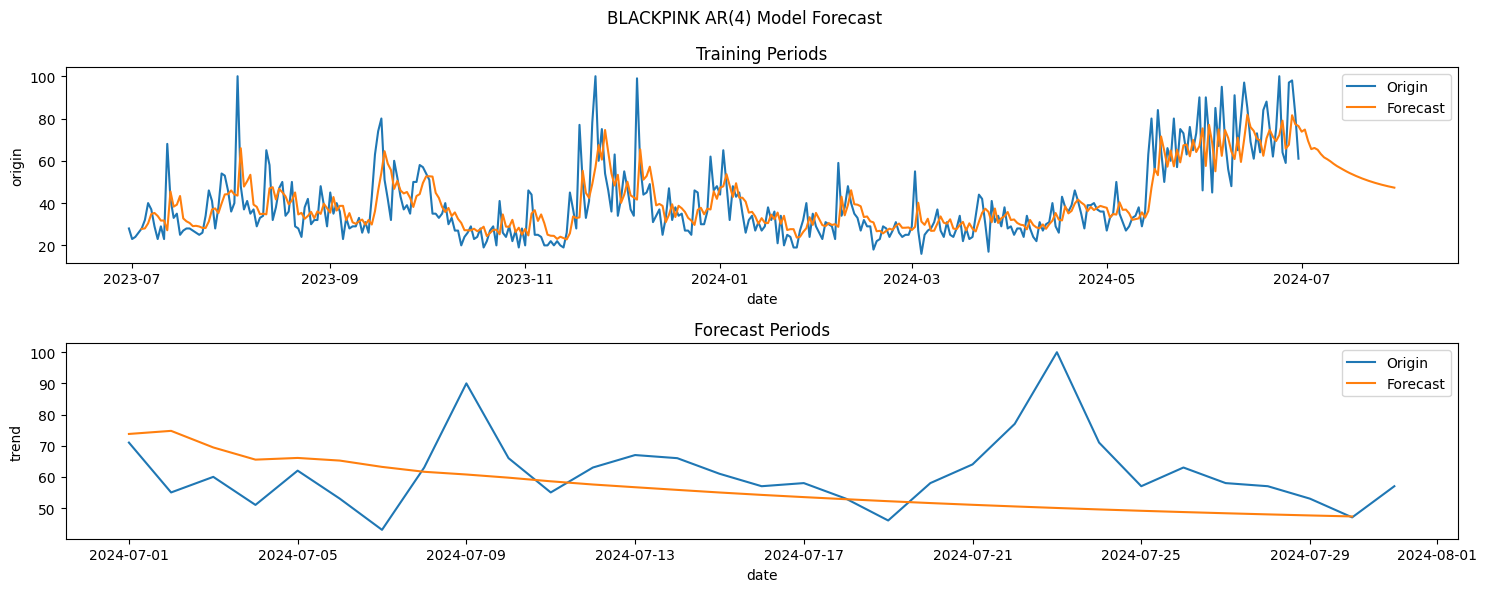

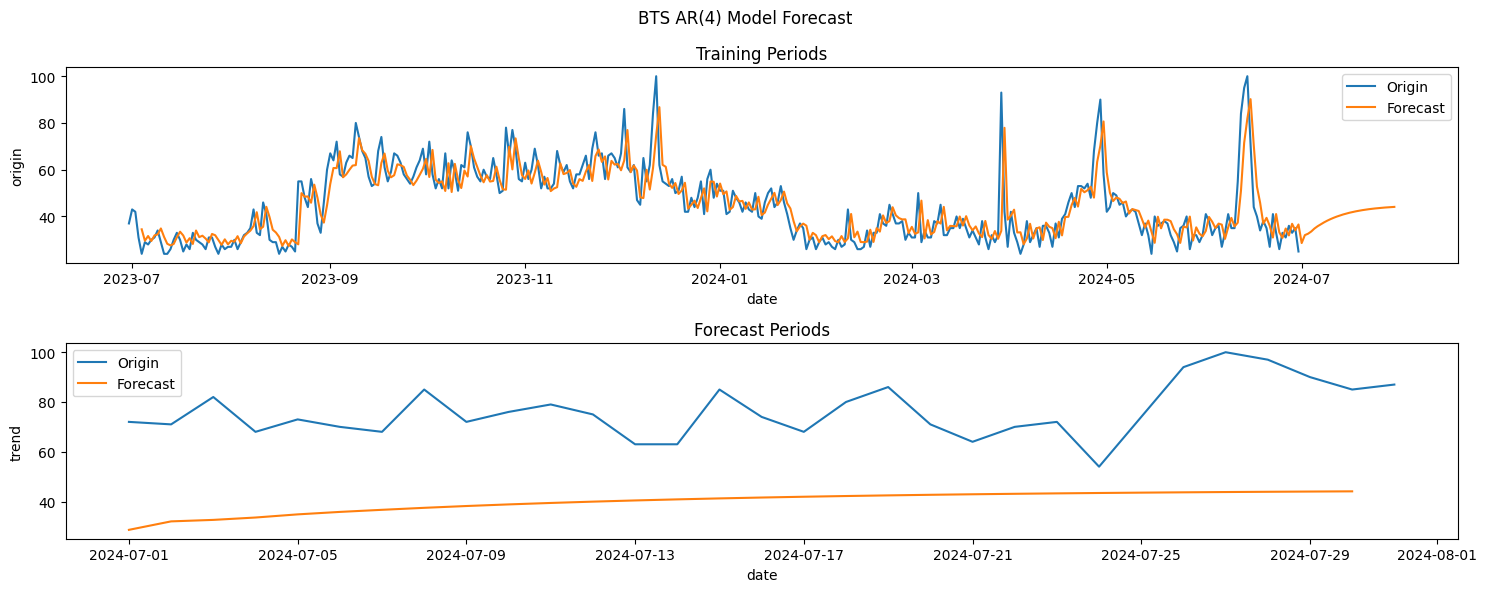

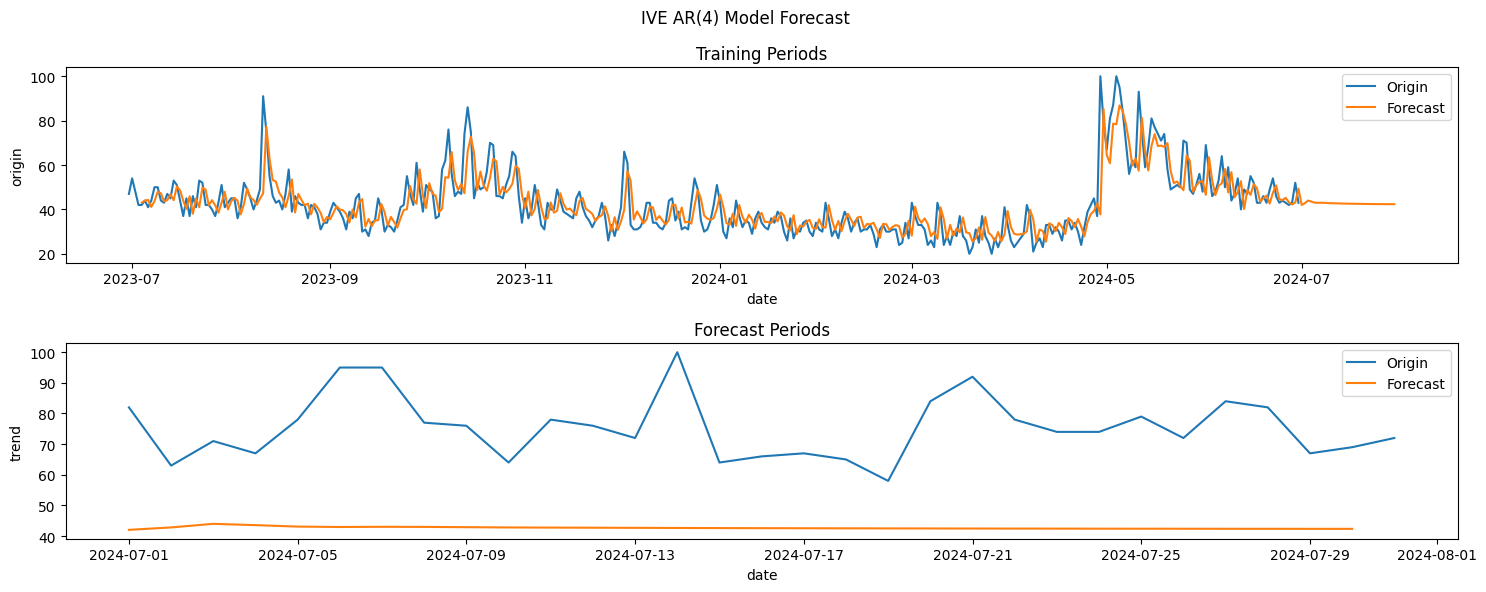

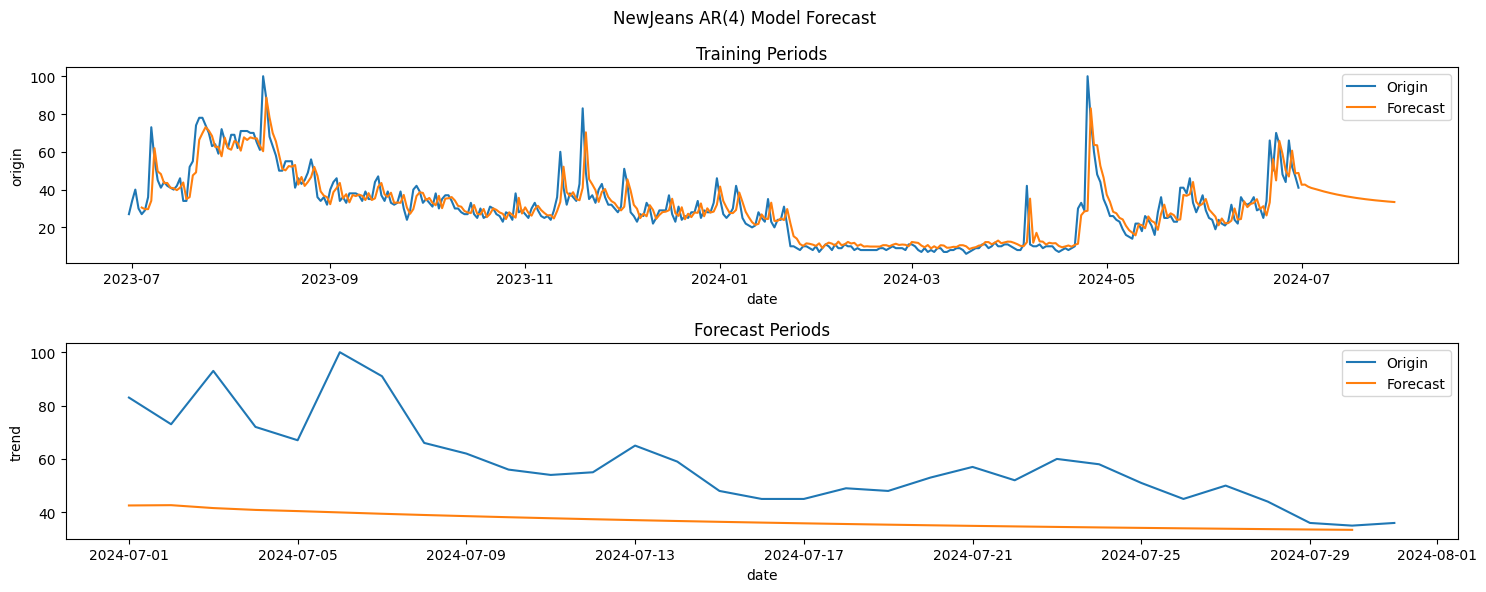

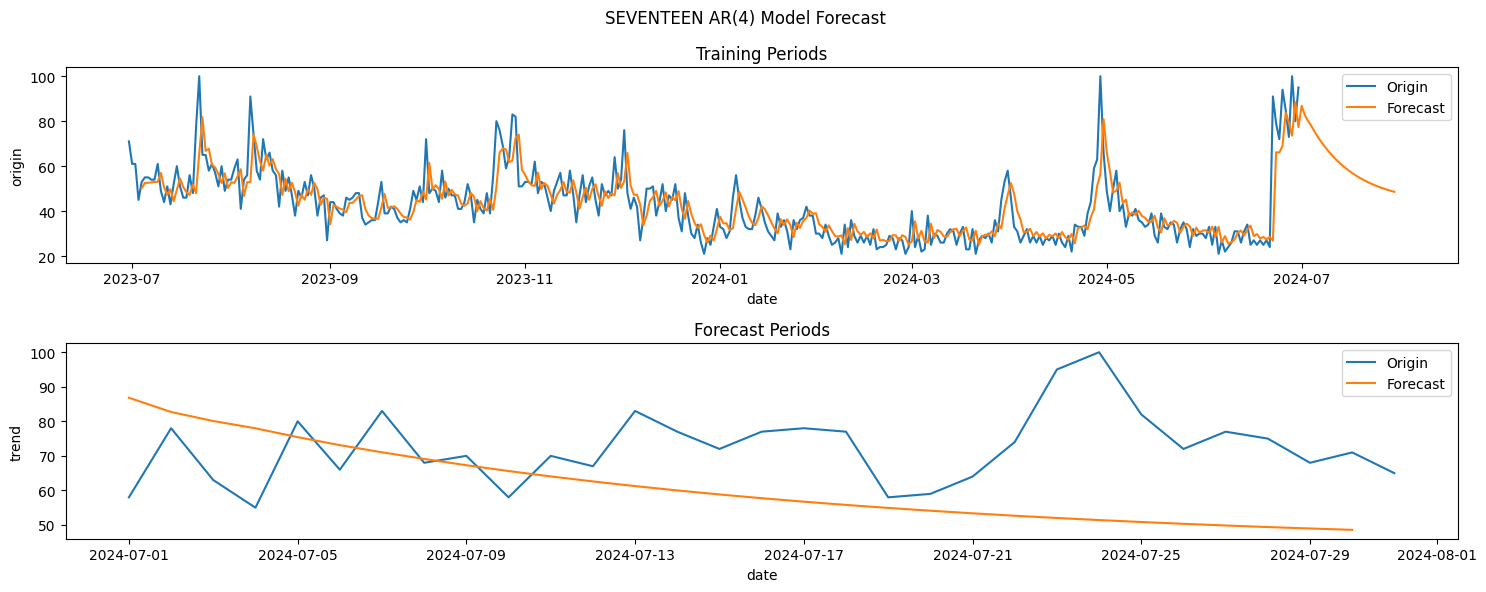

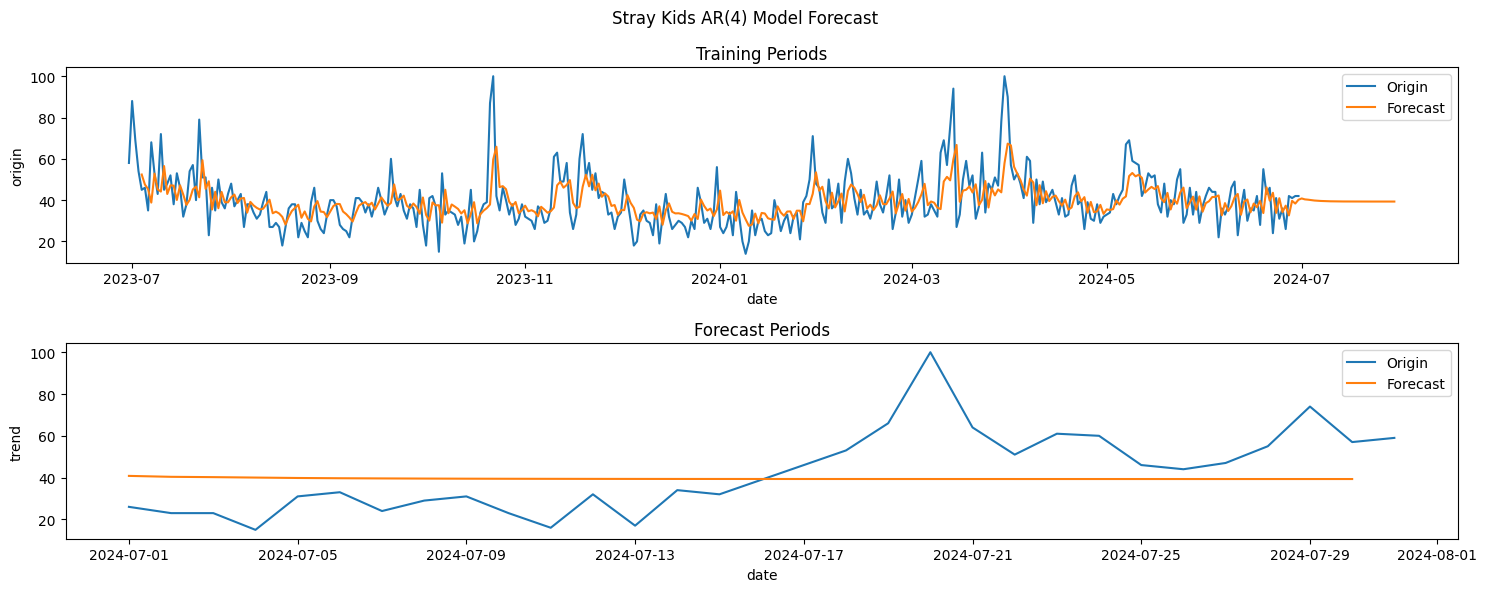

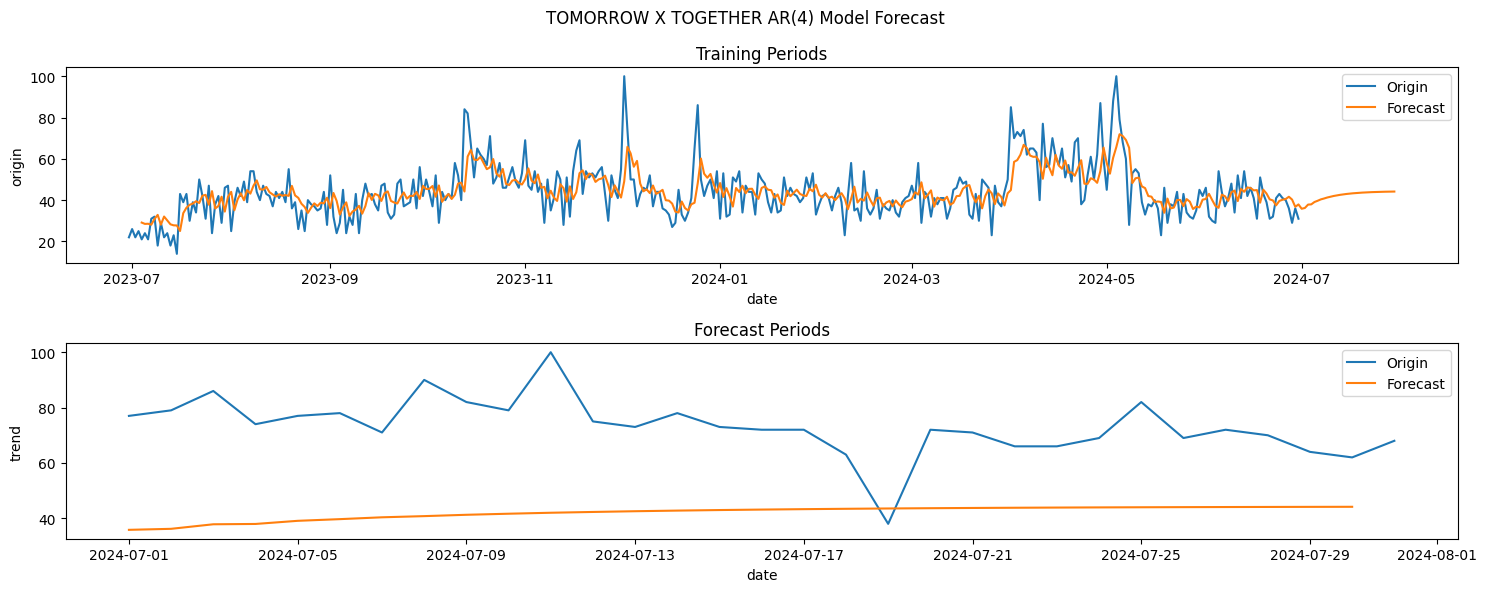

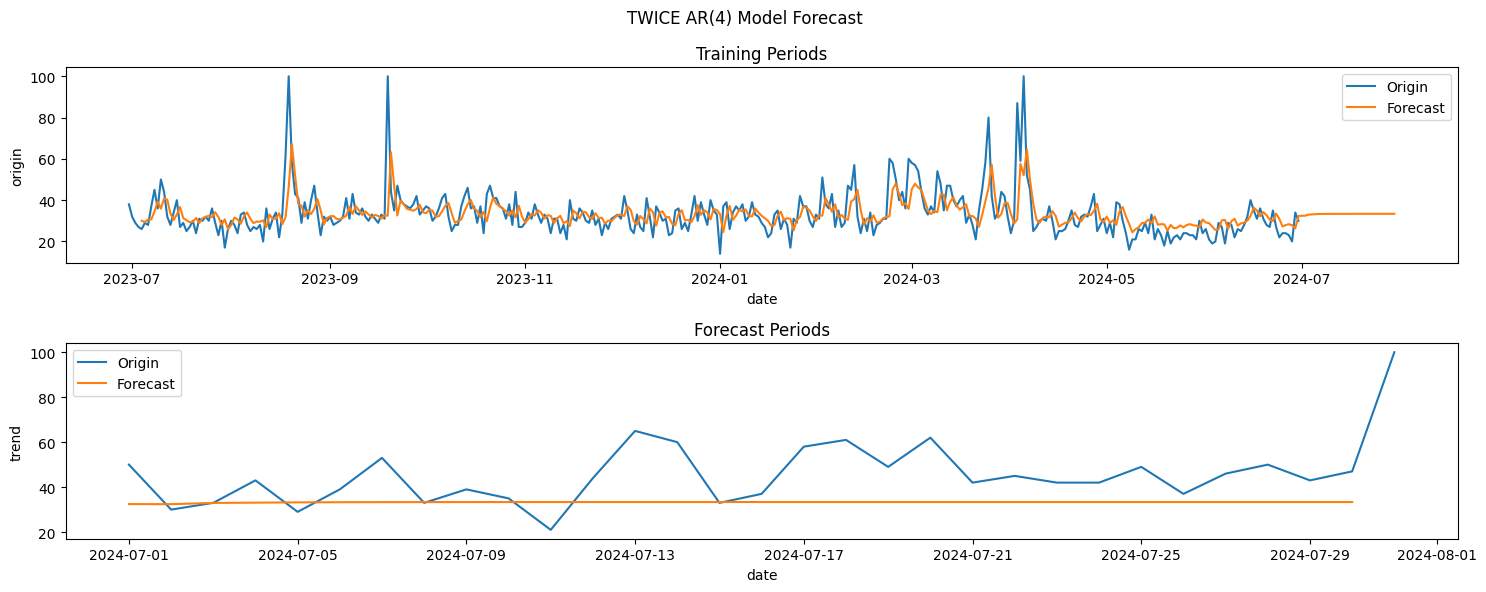

In [52]:
# 예측 결과 시각화
# 단순 AR(2) 모델로는 test dataset에 대하여 거의 맞추지 못함
for artist in forecast_df['artist'].unique():

    fig, axes = plt.subplots(2, 1, figsize=(15, 6))
    plt.suptitle(f'{artist} AR(4) Model Forecast')

    axes[0].set_title('Training Periods')
    sns.lineplot(data=forecast_df[forecast_df['artist'] == artist], x='date', y='origin', label='Origin', ax=axes[0])
    sns.lineplot(data=forecast_df[forecast_df['artist'] == artist], x='date', y='forecast', label='Forecast', ax=axes[0])

    axes[1].set_title('Forecast Periods')
    sns.lineplot(data=google_trend_test_df[google_trend_test_df['artist'] == artist], x='date', y='trend', label='Origin', ax=axes[1])
    sns.lineplot(data=forecast_df[forecast_df['artist'] == artist].query("date >= '2024-07-01'"), x='date', y='forecast', label='Forecast', ax=axes[1])

    plt.legend()
    plt.tight_layout()

    plt.show()

# ARIMA 모델
* 외부요인: 앨범 발매 정보 추가

In [18]:
album_info_df = artist_info_df.drop(['main_genre', 'sub_genre'], axis=1)[['album_name', 'album_type', 'artist_name', 'release_date', 'track_cnt', 'avg_track_play_time']].drop_duplicates()
album_info_df['release_date'] = pd.to_datetime(album_info_df['release_date'])

album_info_df = album_info_df[album_info_df['artist_name'] != 'NCT DREAM']

album_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 4715
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   album_name           220 non-null    object        
 1   album_type           220 non-null    object        
 2   artist_name          220 non-null    object        
 3   release_date         220 non-null    datetime64[ns]
 4   track_cnt            220 non-null    int64         
 5   avg_track_play_time  210 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 12.0+ KB


In [19]:
# 앨범 수록곡 평균 재생 길이 null 값 제거
album_info_df = album_info_df[album_info_df['avg_track_play_time'].isnull() == False]
album_info_df

album_name album_type artist_name release_date  \
0                     LOVE & LETTER      Album   SEVENTEEN   2016-04-25   
8                         TEEN, AGE      Album   SEVENTEEN   2017-11-06   
16                           An Ode      Album   SEVENTEEN   2019-09-16   
24                     Face the Sun      Album   SEVENTEEN   2022-05-27   
32                          17 HITS      Album   SEVENTEEN   2016-10-21   
...                             ...        ...         ...          ...   
4219       You Never Know -JP ver.-     Single   BLACKPINK   2021-08-03   
4343                     Pink Venom     Single   BLACKPINK   2022-08-19   
4467                      THE GIRLS     Single   BLACKPINK   2023-08-25   
4591   SO HOT (THEBLACKLABEL remix)     Single   BLACKPINK   2017-12-25   
4715  DDU‐DU DDU‐DU (remix JP ver.)     Single   BLACKPINK   2019-10-16   

      track_cnt  avg_track_play_time  
0            10        198800.000000  
8            13        179153.846154  
16           11        195363.636364  
24            9        194044.111111  
32           16        196562.500000  
...         ...                  ...  
4219          1        229236.000000  
4343          1        186000.000000  
4467          1        162000.000000  
4591          1        155000.000000  
4715          1        201225.000000  

[210 rows x 6 columns]

In [20]:
# training google trend 와 병합
google_trend_album_df = google_trend_df2.merge(album_info_df, how='left', left_on=['artist', 'date'], right_on=['artist_name', 'release_date']).drop('artist_name', axis=1)
google_trend_album_df

date  trend artist  trend2 album_name album_type release_date  \
0     2020-10-25    NaN  aespa     8.0        NaN        NaN          NaT   
1     2020-10-26    NaN  aespa     8.0        NaN        NaN          NaT   
2     2020-10-27    NaN  aespa     8.0        NaN        NaN          NaT   
3     2020-10-28    NaN  aespa     8.0        NaN        NaN          NaT   
4     2020-10-29    NaN  aespa     8.0        NaN        NaN          NaT   
...          ...    ...    ...     ...        ...        ...          ...   
14625 2024-06-26   24.0  TWICE    24.0        NaN        NaN          NaT   
14626 2024-06-27   23.0  TWICE    23.0        NaN        NaN          NaT   
14627 2024-06-28   20.0  TWICE    20.0        NaN        NaN          NaT   
14628 2024-06-29   34.0  TWICE    34.0        NaN        NaN          NaT   
14629 2024-06-30   30.0  TWICE    30.0        NaN        NaN          NaT   

       track_cnt  avg_track_play_time  
0            NaN                  NaN  
1            NaN                  NaN  
2            NaN                  NaN  
3            NaN                  NaN  
4            NaN                  NaN  
...          ...                  ...  
14625        NaN                  NaN  
14626        NaN                  NaN  
14627        NaN                  NaN  
14628        NaN                  NaN  
14629        NaN                  NaN  

[14630 rows x 9 columns]

In [21]:
# 앨범 발매일 이후 7일 동일 데이터 적용
# 앨범 초동 판매량 집계 기준일에 따라 7일 적용
for i, row in google_trend_album_df.iterrows():

    artist = row['artist']
    release_date = row['release_date']
    end_date = release_date + pd.Timedelta(days=7)  # 발매일 이후 7일

    # 해당 기간에 데이터 할당
    mask = (google_trend_album_df['artist'] == artist) & \
           (google_trend_album_df['date'] >= release_date) & (google_trend_album_df['date'] < end_date)

    google_trend_album_df.loc[mask, 'release_date'] = row['release_date']
    google_trend_album_df.loc[mask, 'album_name'] = row['album_name']
    google_trend_album_df.loc[mask, 'album_type'] = row['album_type']

    google_trend_album_df.loc[mask, 'track_cnt'] = row['track_cnt']
    google_trend_album_df.loc[mask, 'avg_track_play_time'] = row['avg_track_play_time']

google_trend_album_df[google_trend_album_df['album_name'].isnull() == False]

date  trend artist  trend2   album_name album_type release_date  \
23    2020-11-17   37.0  aespa    37.0  Black Mamba     Single   2020-11-17   
24    2020-11-18   36.0  aespa    36.0  Black Mamba     Single   2020-11-17   
25    2020-11-19   27.0  aespa    27.0  Black Mamba     Single   2020-11-17   
26    2020-11-20   41.0  aespa    41.0  Black Mamba     Single   2020-11-17   
27    2020-11-21   31.0  aespa    31.0  Black Mamba     Single   2020-11-17   
...          ...    ...    ...     ...          ...        ...          ...   
14410 2023-11-24   31.0  TWICE    31.0  THE REMIXES      Album   2023-11-22   
14411 2023-11-25   23.0  TWICE    23.0  THE REMIXES      Album   2023-11-22   
14412 2023-11-26   29.0  TWICE    29.0  THE REMIXES      Album   2023-11-22   
14413 2023-11-27   26.0  TWICE    26.0  THE REMIXES      Album   2023-11-22   
14414 2023-11-28   31.0  TWICE    31.0  THE REMIXES      Album   2023-11-22   

       track_cnt  avg_track_play_time  
23           1.0        174933.000000  
24           1.0        174933.000000  
25           1.0        174933.000000  
26           1.0        174933.000000  
27           1.0        174933.000000  
...          ...                  ...  
14410        7.0        183437.142857  
14411        7.0        183437.142857  
14412        7.0        183437.142857  
14413        7.0        183437.142857  
14414        7.0        183437.142857  

[1002 rows x 9 columns]

In [22]:
# 앨범 장르 인코딩
encoded_album_type_df = pd.get_dummies(google_trend_album_df['album_type'])
google_trend_album_df = pd.concat([google_trend_album_df, encoded_album_type_df], axis=1)

# 모든 bool 타입 열을 1/0으로 변환
google_trend_album_df = google_trend_album_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

google_trend_album_df

date  trend artist  trend2 album_name album_type release_date  \
0     2020-10-25    NaN  aespa     8.0        NaN        NaN          NaT   
1     2020-10-26    NaN  aespa     8.0        NaN        NaN          NaT   
2     2020-10-27    NaN  aespa     8.0        NaN        NaN          NaT   
3     2020-10-28    NaN  aespa     8.0        NaN        NaN          NaT   
4     2020-10-29    NaN  aespa     8.0        NaN        NaN          NaT   
...          ...    ...    ...     ...        ...        ...          ...   
14625 2024-06-26   24.0  TWICE    24.0        NaN        NaN          NaT   
14626 2024-06-27   23.0  TWICE    23.0        NaN        NaN          NaT   
14627 2024-06-28   20.0  TWICE    20.0        NaN        NaN          NaT   
14628 2024-06-29   34.0  TWICE    34.0        NaN        NaN          NaT   
14629 2024-06-30   30.0  TWICE    30.0        NaN        NaN          NaT   

       track_cnt  avg_track_play_time  Album  Broadcast  EP  Other  Single  
0            NaN                  NaN      0          0   0      0       0  
1            NaN                  NaN      0          0   0      0       0  
2            NaN                  NaN      0          0   0      0       0  
3            NaN                  NaN      0          0   0      0       0  
4            NaN                  NaN      0          0   0      0       0  
...          ...                  ...    ...        ...  ..    ...     ...  
14625        NaN                  NaN      0          0   0      0       0  
14626        NaN                  NaN      0          0   0      0       0  
14627        NaN                  NaN      0          0   0      0       0  
14628        NaN                  NaN      0          0   0      0       0  
14629        NaN                  NaN      0          0   0      0       0  

[14630 rows x 14 columns]

In [23]:
google_trend_album_df = google_trend_album_df.drop(['album_type'], axis=1)
google_trend_album_df

date  trend artist  trend2 album_name release_date  track_cnt  \
0     2020-10-25    NaN  aespa     8.0        NaN          NaT        NaN   
1     2020-10-26    NaN  aespa     8.0        NaN          NaT        NaN   
2     2020-10-27    NaN  aespa     8.0        NaN          NaT        NaN   
3     2020-10-28    NaN  aespa     8.0        NaN          NaT        NaN   
4     2020-10-29    NaN  aespa     8.0        NaN          NaT        NaN   
...          ...    ...    ...     ...        ...          ...        ...   
14625 2024-06-26   24.0  TWICE    24.0        NaN          NaT        NaN   
14626 2024-06-27   23.0  TWICE    23.0        NaN          NaT        NaN   
14627 2024-06-28   20.0  TWICE    20.0        NaN          NaT        NaN   
14628 2024-06-29   34.0  TWICE    34.0        NaN          NaT        NaN   
14629 2024-06-30   30.0  TWICE    30.0        NaN          NaT        NaN   

       avg_track_play_time  Album  Broadcast  EP  Other  Single  
0                      NaN      0          0   0      0       0  
1                      NaN      0          0   0      0       0  
2                      NaN      0          0   0      0       0  
3                      NaN      0          0   0      0       0  
4                      NaN      0          0   0      0       0  
...                    ...    ...        ...  ..    ...     ...  
14625                  NaN      0          0   0      0       0  
14626                  NaN      0          0   0      0       0  
14627                  NaN      0          0   0      0       0  
14628                  NaN      0          0   0      0       0  
14629                  NaN      0          0   0      0       0  

[14630 rows x 13 columns]

In [24]:
# 최신 앨범 발매일 도달 기간
google_trend_album_df['release_duration'] = (google_trend_album_df['date'] - google_trend_album_df['release_date']).dt.days
google_trend_album_df

date  trend artist  trend2 album_name release_date  track_cnt  \
0     2020-10-25    NaN  aespa     8.0        NaN          NaT        NaN   
1     2020-10-26    NaN  aespa     8.0        NaN          NaT        NaN   
2     2020-10-27    NaN  aespa     8.0        NaN          NaT        NaN   
3     2020-10-28    NaN  aespa     8.0        NaN          NaT        NaN   
4     2020-10-29    NaN  aespa     8.0        NaN          NaT        NaN   
...          ...    ...    ...     ...        ...          ...        ...   
14625 2024-06-26   24.0  TWICE    24.0        NaN          NaT        NaN   
14626 2024-06-27   23.0  TWICE    23.0        NaN          NaT        NaN   
14627 2024-06-28   20.0  TWICE    20.0        NaN          NaT        NaN   
14628 2024-06-29   34.0  TWICE    34.0        NaN          NaT        NaN   
14629 2024-06-30   30.0  TWICE    30.0        NaN          NaT        NaN   

       avg_track_play_time  Album  Broadcast  EP  Other  Single  \
0                      NaN      0          0   0      0       0   
1                      NaN      0          0   0      0       0   
2                      NaN      0          0   0      0       0   
3                      NaN      0          0   0      0       0   
4                      NaN      0          0   0      0       0   
...                    ...    ...        ...  ..    ...     ...   
14625                  NaN      0          0   0      0       0   
14626                  NaN      0          0   0      0       0   
14627                  NaN      0          0   0      0       0   
14628                  NaN      0          0   0      0       0   
14629                  NaN      0          0   0      0       0   

       release_duration  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
14625               NaN  
14626               NaN  
14627               NaN  
14628               NaN  
14629               NaN  

[14630 rows x 14 columns]

In [25]:
google_trend_album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14630 entries, 0 to 14629
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 14630 non-null  datetime64[ns]
 1   trend                13199 non-null  float64       
 2   artist               14630 non-null  object        
 3   trend2               14630 non-null  float64       
 4   album_name           1002 non-null   object        
 5   release_date         1002 non-null   datetime64[ns]
 6   track_cnt            1002 non-null   float64       
 7   avg_track_play_time  1002 non-null   float64       
 8   Album                14630 non-null  int64         
 9   Broadcast            14630 non-null  int64         
 10  EP                   14630 non-null  int64         
 11  Other                14630 non-null  int64         
 12  Single               14630 non-null  int64         
 13  release_duration     1002 non-n

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.auto import tqdm
import pandas as pd

forecast_arima_df_list = []
for artist in tqdm(google_trend_album_df['artist'].unique()):

    artist_trend_df = google_trend_album_df[google_trend_album_df['artist'] == artist].reset_index(drop=True)

    # 아티스트 별 수집 마지막 기간으로부터 이전 1년 데이터만 사용
    start_date = artist_trend_df.loc[len(artist_trend_df)-1, 'date'] - pd.DateOffset(years=1)

    trend_df = artist_trend_df[artist_trend_df['date'] >= start_date].reset_index(drop=True)[['date', 'trend2', 'release_duration', 'track_cnt', 'avg_track_play_time', 'Album', 'Broadcast', 'EP', 'Other', 'Single']]

    # ARIMA 모델 적합 (p, d, q 값은 ACF, PACF 결과를 기반으로 설정)
    model = SARIMAX(
        endog=trend_df['trend2'],
        order=(4, 1, 4),
        seasonal_order=(4, 1, 4, 12),
        # exog=['release_duration', 'track_cnt', 'avg_track_play_time', 'Album', 'Broadcast', 'EP', 'Other', 'Single']
    )  # (p, d, q)는 ACF, PACF 결과를 바탕으로 설정 필요
    model_fit = model.fit(disp=False)

    # 모델 예측
    forecast_days_num = 30 # 훈련 기간 이후 예측하고자 하는 일수
    end_date = artist_trend_df.loc[len(artist_trend_df)-1, 'date'] + pd.DateOffset(days=forecast_days_num)  # 이후 한 달 예측

    date_df = pd.date_range(start=start_date, end=end_date, freq='D')
    date_df = pd.DataFrame(date_df, columns=['date'])

    predict_df = model_fit.get_prediction(start=trend_df.index[0], end=trend_df.index[-1]+forecast_days_num).predicted_mean # 훈련 기간 예측 결과 + 이후 한 달 forecast

    # 예측 결과를 DataFrame으로 결합
    result_df = pd.concat([date_df, predict_df], axis=1).merge(
        google_trend_df2[google_trend_df2['artist'] == artist][['date', 'trend2']],
        how='left',
        on='date'
    )
    result_df.columns = ['date', 'forecast', 'origin']

    result_df['artist'] = artist
    forecast_arima_df_list.append(result_df)

forecast_arima_df = pd.concat(forecast_arima_df_list, ignore_index=True)
forecast_arima_df

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

date   forecast  origin artist
0    2023-06-30   0.000000    21.0  aespa
1    2023-07-01  20.999370    28.0  aespa
2    2023-07-02  27.999342    19.0  aespa
3    2023-07-03  19.000488    23.0  aespa
4    2023-07-04  23.000027    17.0  aespa
...         ...        ...     ...    ...
3572 2024-07-26  26.480983     NaN  TWICE
3573 2024-07-27  28.704787     NaN  TWICE
3574 2024-07-28  29.612383     NaN  TWICE
3575 2024-07-29  28.166796     NaN  TWICE
3576 2024-07-30  24.923008     NaN  TWICE

[3577 rows x 4 columns]

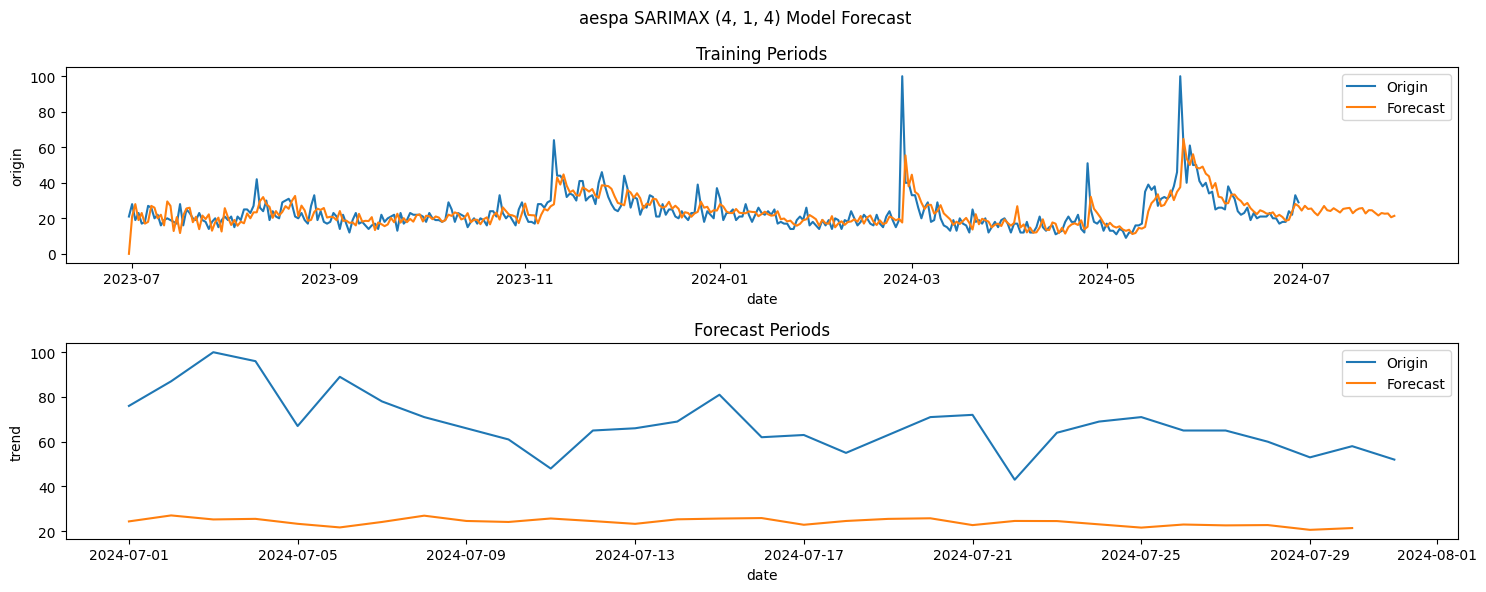

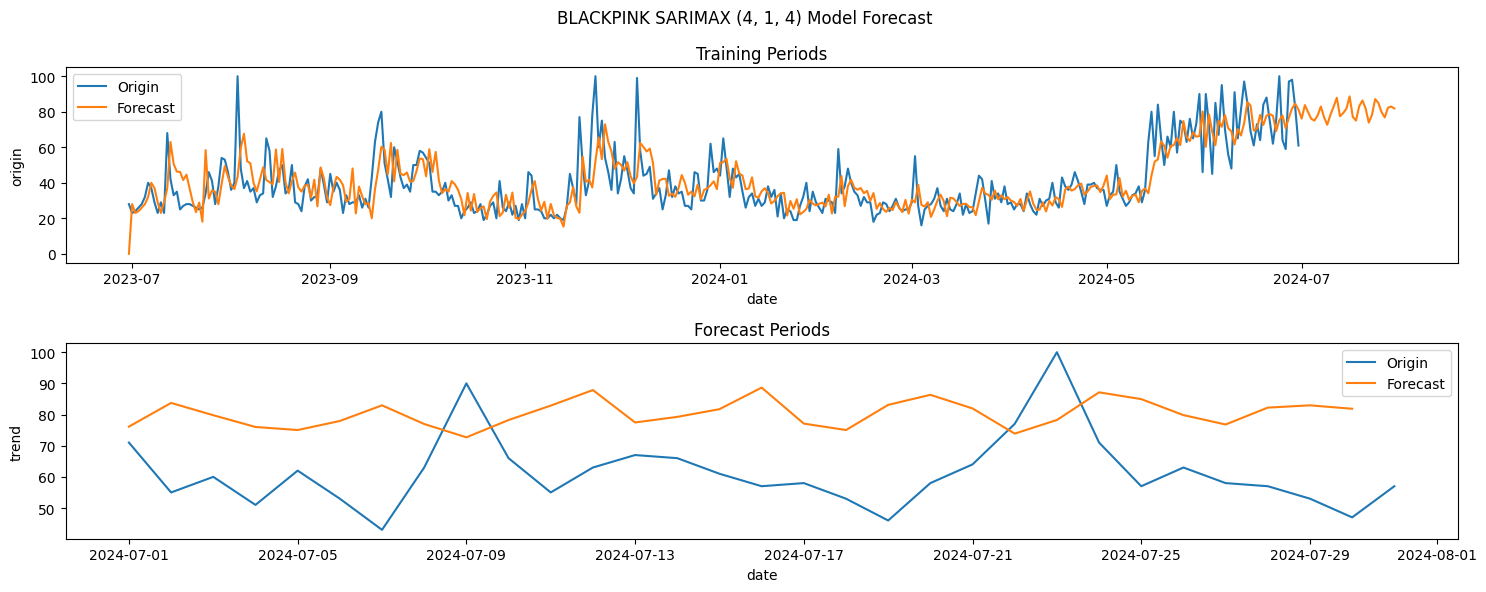

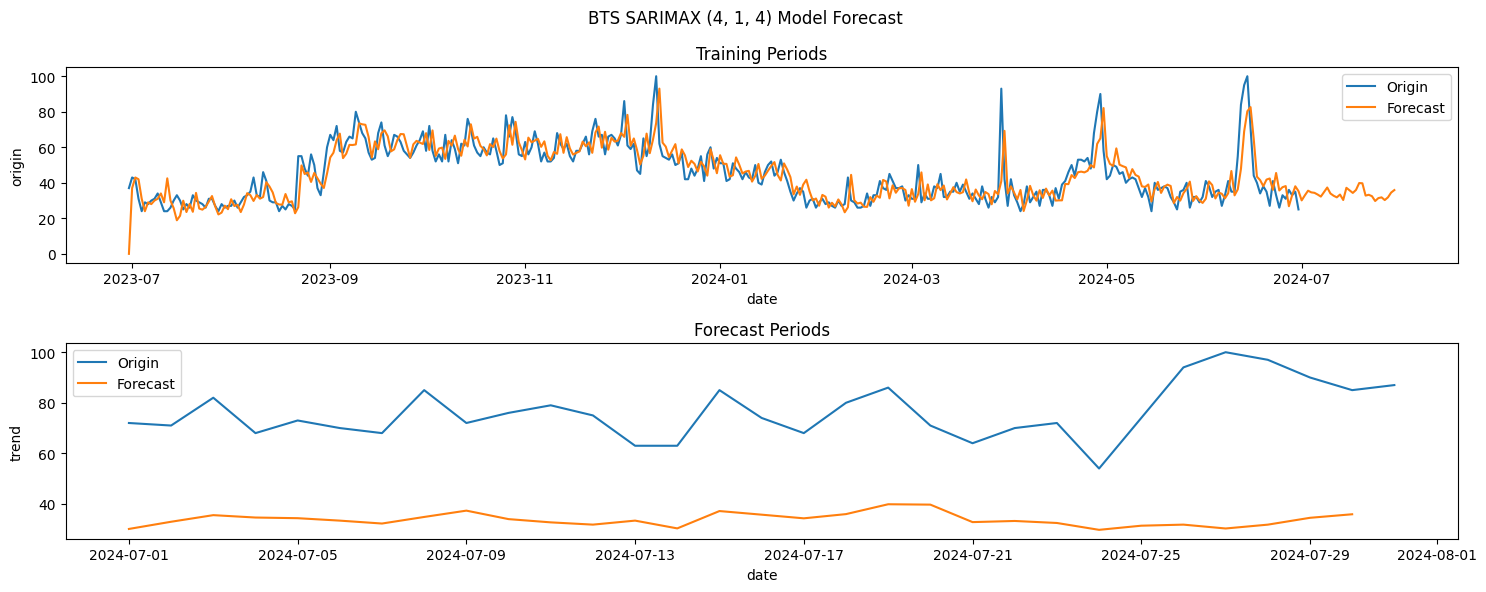

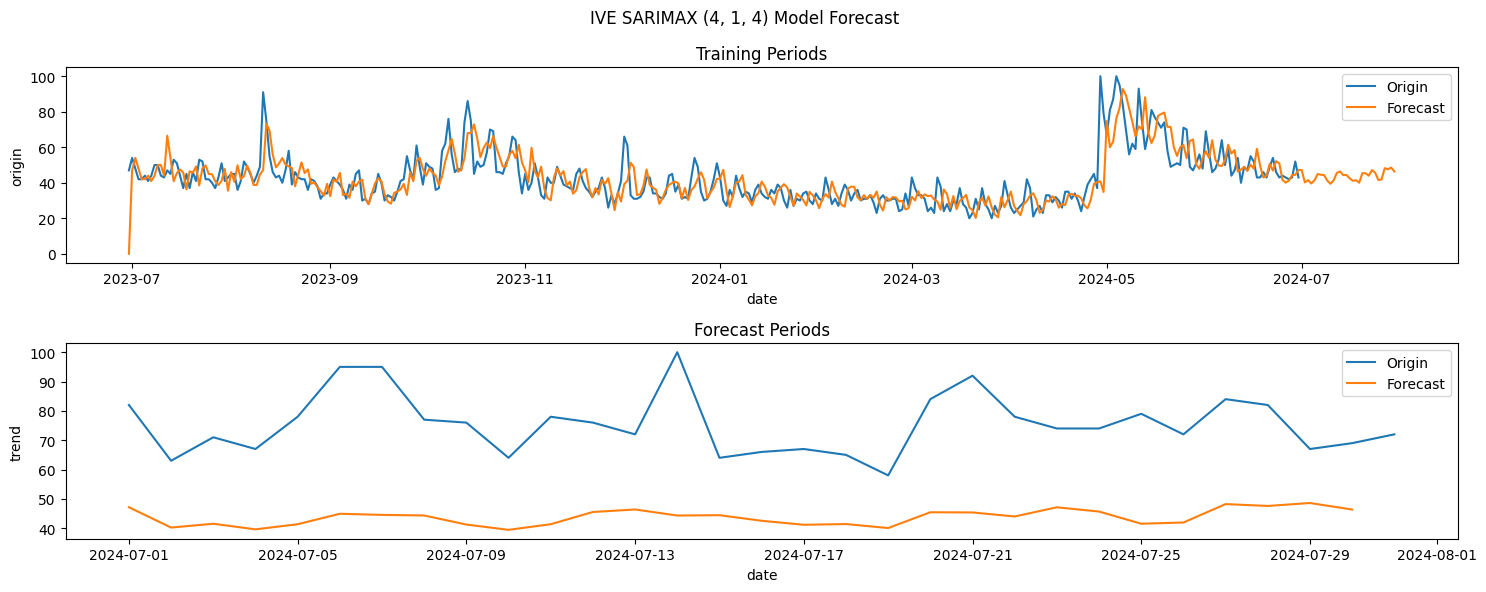

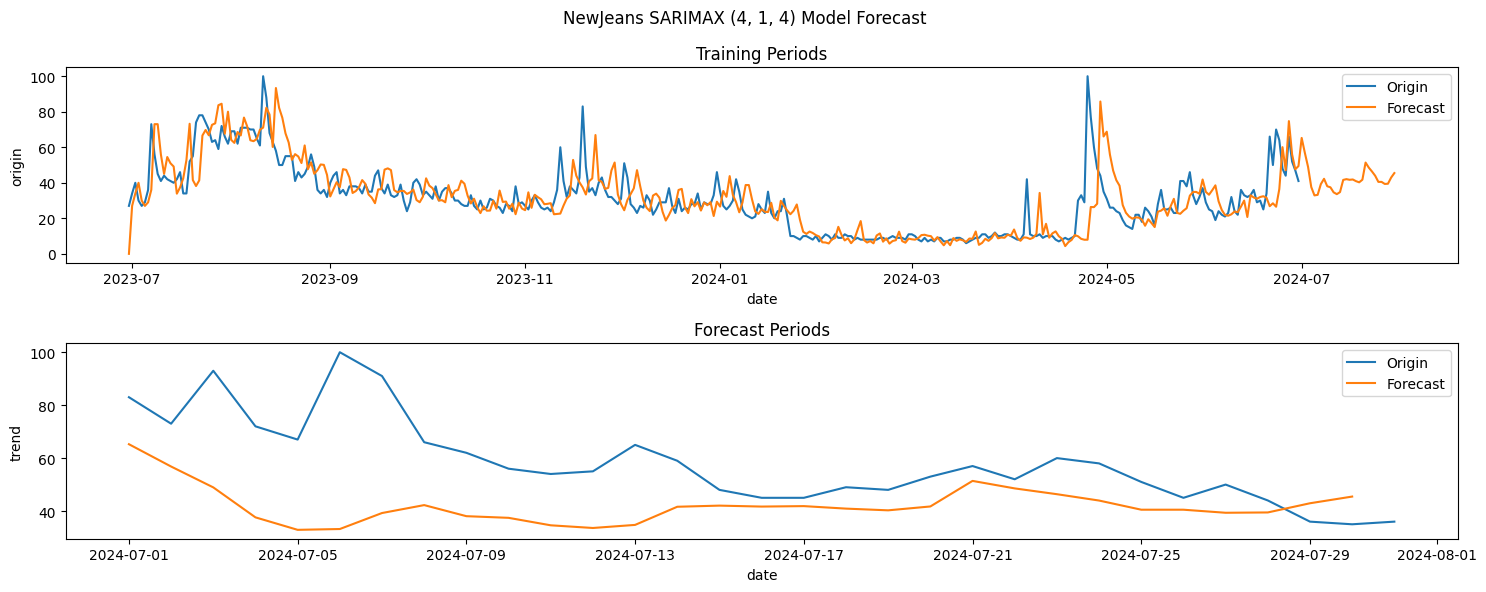

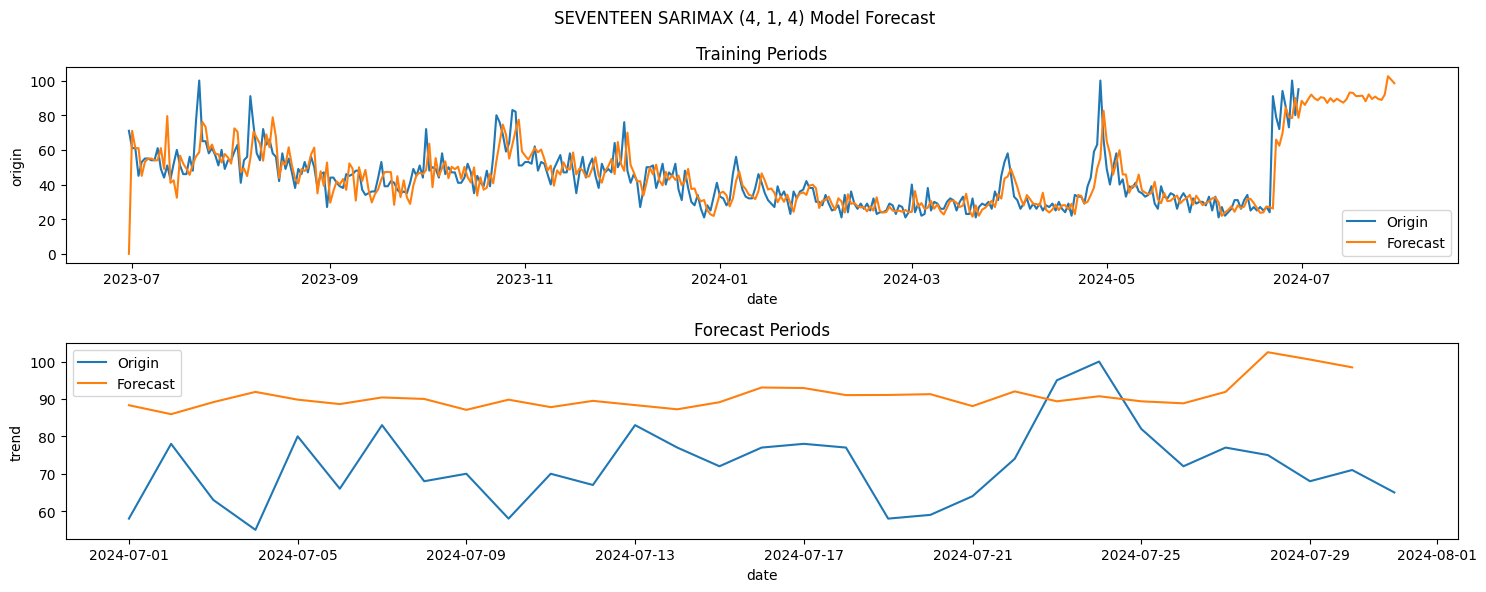

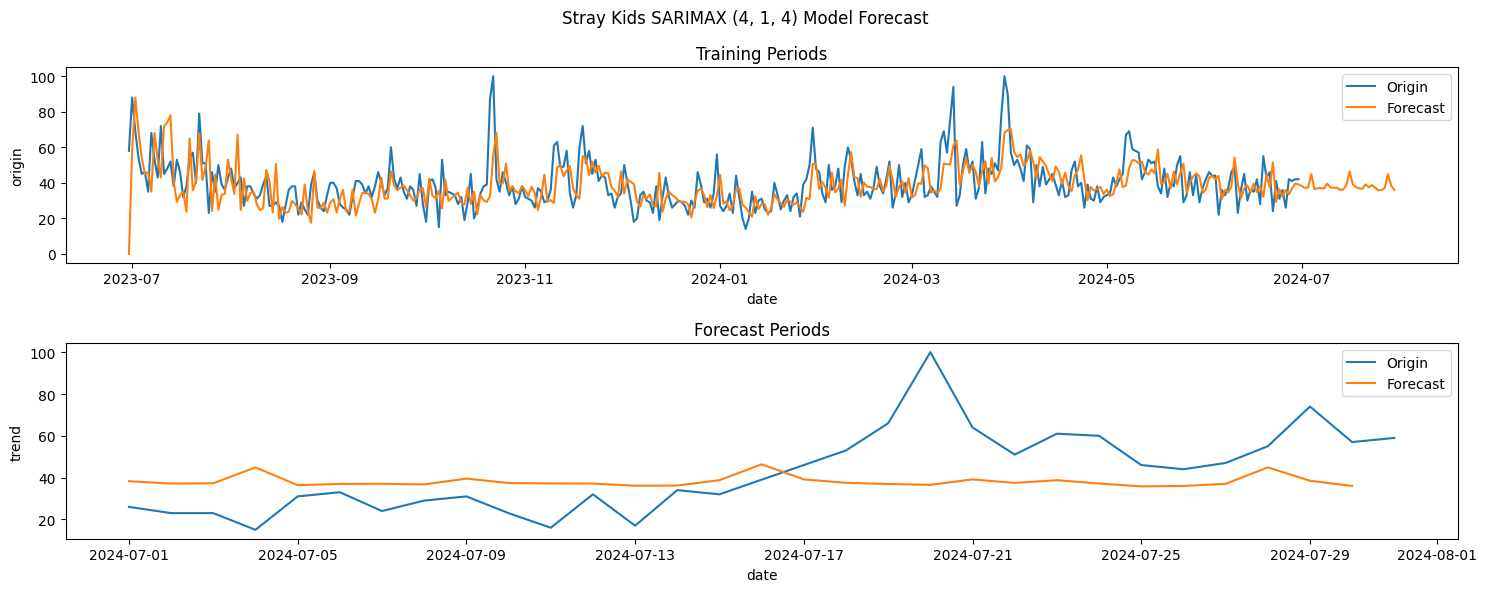

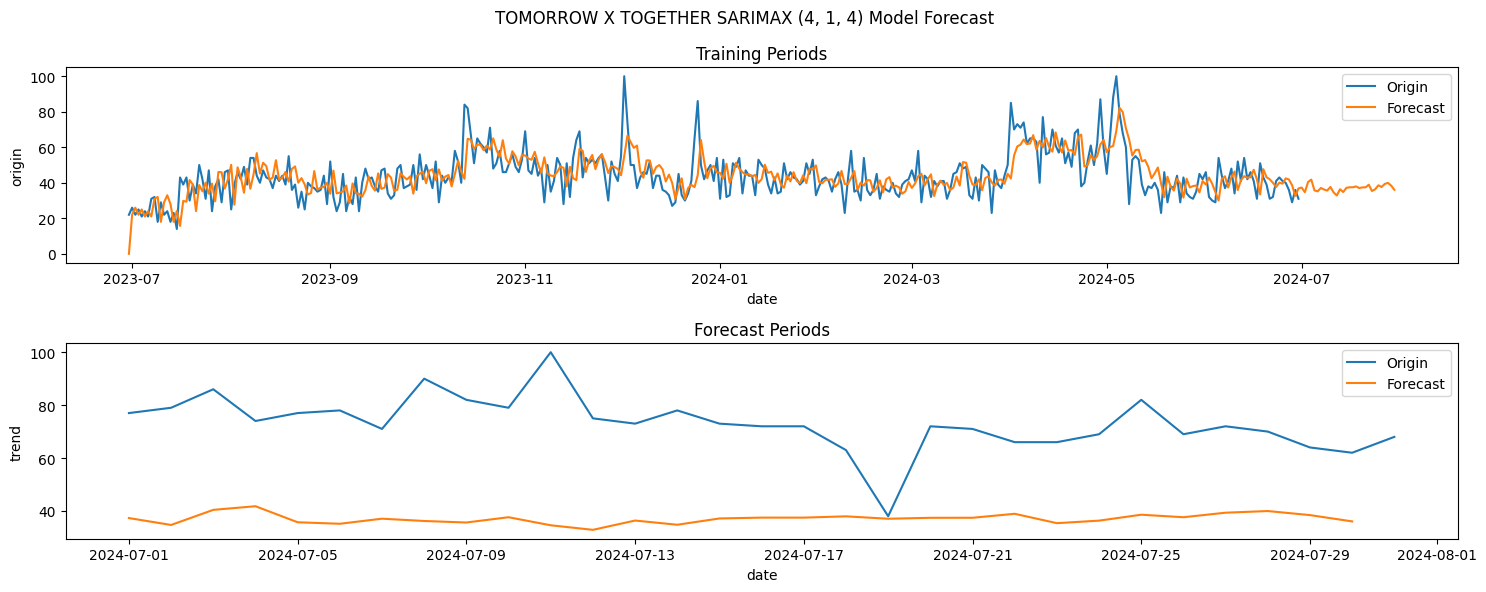

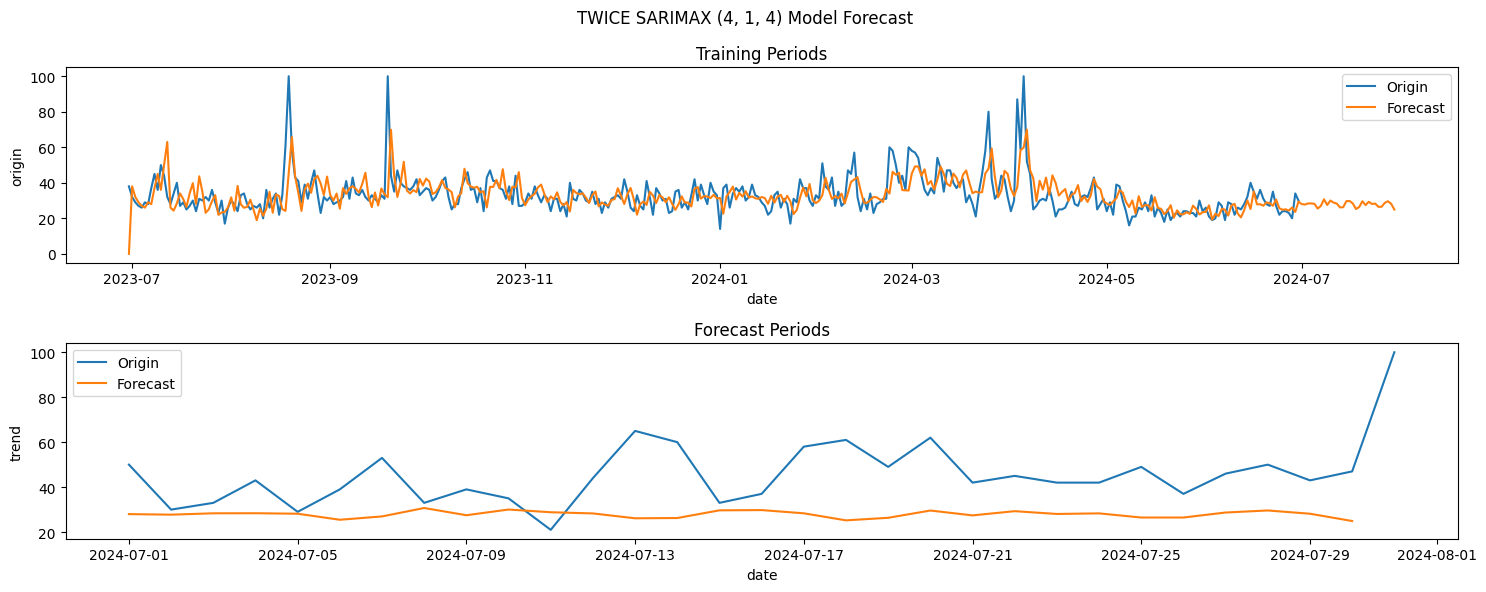

In [54]:
# 예측 결과 시각화
for artist in forecast_arima_df['artist'].unique():

    fig, axes = plt.subplots(2, 1, figsize=(15, 6))
    plt.suptitle(f'{artist} SARIMAX (4, 1, 4) Model Forecast')

    axes[0].set_title('Training Periods')
    sns.lineplot(data=forecast_arima_df[forecast_arima_df['artist'] == artist], x='date', y='origin', label='Origin', ax=axes[0])
    sns.lineplot(data=forecast_arima_df[forecast_arima_df['artist'] == artist], x='date', y='forecast', label='Forecast', ax=axes[0])

    axes[1].set_title('Forecast Periods')
    sns.lineplot(data=google_trend_test_df[google_trend_test_df['artist'] == artist], x='date', y='trend', label='Origin', ax=axes[1])
    sns.lineplot(data=forecast_arima_df[forecast_arima_df['artist'] == artist].query("date >= '2024-07-01'"), x='date', y='forecast', label='Forecast', ax=axes[1])

    plt.legend()
    plt.tight_layout()

    plt.show()

In [60]:
# 앨범 데이터 적용
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.auto import tqdm
import pandas as pd

forecast_arima_ext_df_list = []
for artist in tqdm(google_trend_album_df['artist'].unique()):

    artist_trend_df = google_trend_album_df[google_trend_album_df['artist'] == artist].reset_index(drop=True)

    # 아티스트 별 수집 마지막 기간으로부터 이전 1년 데이터만 사용
    start_date = artist_trend_df.loc[len(artist_trend_df)-1, 'date'] - pd.DateOffset(years=1)

    trend_df = artist_trend_df[artist_trend_df['date'] >= start_date].reset_index(drop=True)[['date', 'trend2', 'release_duration', 'track_cnt', 'avg_track_play_time', 'Album', 'Broadcast', 'EP', 'Other', 'Single']]
    trend_df = trend_df.fillna(0)

    # ARIMA 모델 적합 (p, d, q 값은 ACF, PACF 결과를 기반으로 설정)
    model = SARIMAX(
        endog=trend_df['trend2'],
        order=(4, 1, 4),
        seasonal_order=(4, 1, 4, 12),
        # exog=['release_duration', 'track_cnt', 'avg_track_play_time'], 'Album', 'Broadcast', 'EP', 'Other', 'Single'] # 앨범 데이터 적용
        exog=['Album', 'Broadcast', 'EP', 'Other', 'Single'] # 앨범 데이터 적용
    )  # (p, d, q)는 ACF, PACF 결과를 바탕으로 설정 필요
    model_fit = model.fit(disp=False)

    # 모델 예측
    forecast_days_num = 30 # 훈련 기간 이후 예측하고자 하는 일수
    end_date = artist_trend_df.loc[len(artist_trend_df)-1, 'date'] + pd.DateOffset(days=forecast_days_num)  # 이후 한 달 예측

    date_df = pd.date_range(start=start_date, end=end_date, freq='D')
    date_df = pd.DataFrame(date_df, columns=['date'])

    predict_df = model_fit.get_prediction(start=trend_df.index[0], end=trend_df.index[-1]+forecast_days_num).predicted_mean # 훈련 기간 예측 결과 + 이후 한 달 forecast

    # 예측 결과를 DataFrame으로 결합
    result_df = pd.concat([date_df, predict_df], axis=1).merge(
        google_trend_df2[google_trend_df2['artist'] == artist][['date', 'trend2']],
        how='left',
        on='date'
    )
    result_df.columns = ['date', 'forecast', 'origin']

    result_df['artist'] = artist
    forecast_arima_ext_df_list.append(result_df)

forecast_arima_ext_df = pd.concat(forecast_arima_ext_df_list, ignore_index=True)
forecast_arima_ext_df

  0%|          | 0/9 [00:00<?, ?it/s]

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U9'), dtype('<U9')) -> None